<h1>Relazione 2 - Breast Cancer</h1>

Analisi di ML su un DataFrame chiamato 'df_BreastCancer' di previsione di diagnosi
dei tumori <br> se benigni o maligni

In [64]:
#Importo le librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
#Importo il file del DataSet da analizzare
df_BreastCancer = pd.read_csv('data.csv')

df_BreastCancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


<h3>Features Analysis</h3>

Processo di preparazione dei dati del DataSet

In [66]:
#Controllo se il DataFrame ha valori nulli
df_BreastCancer.isnull().sum().sum() #Conta il totale dei valori nulli

569

In [67]:
#Il DataFrame presenta 569 valori nulli pertanto verifico in quali colonne, specificatamente,
#dove si presentano

df_BreastCancer.isnull().any()


id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [68]:
#Da ciò, evidenzo, che la colonna 'Unnamed: 32' è l'unica colonna che contiene i valori nulli
#di cui 569 (il numero totale dei valori per ogni colonna); quindi, di conseguenza, questa
#colonna presenta valori tutti nulli, pertanto colonna inutile per quanto riguarda l'analisi,
#quindi la elimino completamente. Pure la colonna 'id' risulta irrilevante, quindi elimino pure
#quella.
df_BreastCancer = df_BreastCancer.drop(columns=['id', 'Unnamed: 32'])



In [69]:
#1.Descrizione del Dataset con le funzioni 'info' e 'describe'

#INFO
#Con 'info' verifico che tipo di dati ho nel DataFrame
df_BreastCancerINFO = df_BreastCancer.info()
df_BreastCancerINFO

#In questo caso noto che ho:
   #29 varibili numeriche ('float')
   #una sola varibile categorica (object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [70]:
#DESCRIBE
#Con 'describe' ottengo una descrizione statstica del DataFrame come, ad esempio,
#la media, la deviazione standard, il valore minimo e massimo per ogni variabile.
df_BreastCancerDESCRIBE = df_BreastCancer.describe()
df_BreastCancerDESCRIBE

#Considerazioni:
    #.media:  rappresenta il valore medio delle osservazioni della rispettiva colonna. 
    #Ad esempio, per la colonna "radius_mean" la media è di 14.127292.
    
    #.mediana: rappresenta il valore centrale di una distribuzione di frequenza ordinata. 
    #Ad esempio, per la colonna "radius_mean" la mediana è di 13.37. 
    #Ciò significa che il 50% dei valori è inferiore a 13.37 e 
    #il restante 50% è superiore a questo valore.

    #.deviazione_standard: rappresenta la dispersione dei dati rispetto alla media. 
    #Più la deviazione standard è grande, maggiore è la variabilità dei dati. 
    #Ad esempio, per la colonna "radius_mean" la deviazione standard è di 3.524049. 
    #Ciò indica che i valori di questa colonna sono piuttosto distribuiti intorno alla media.

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


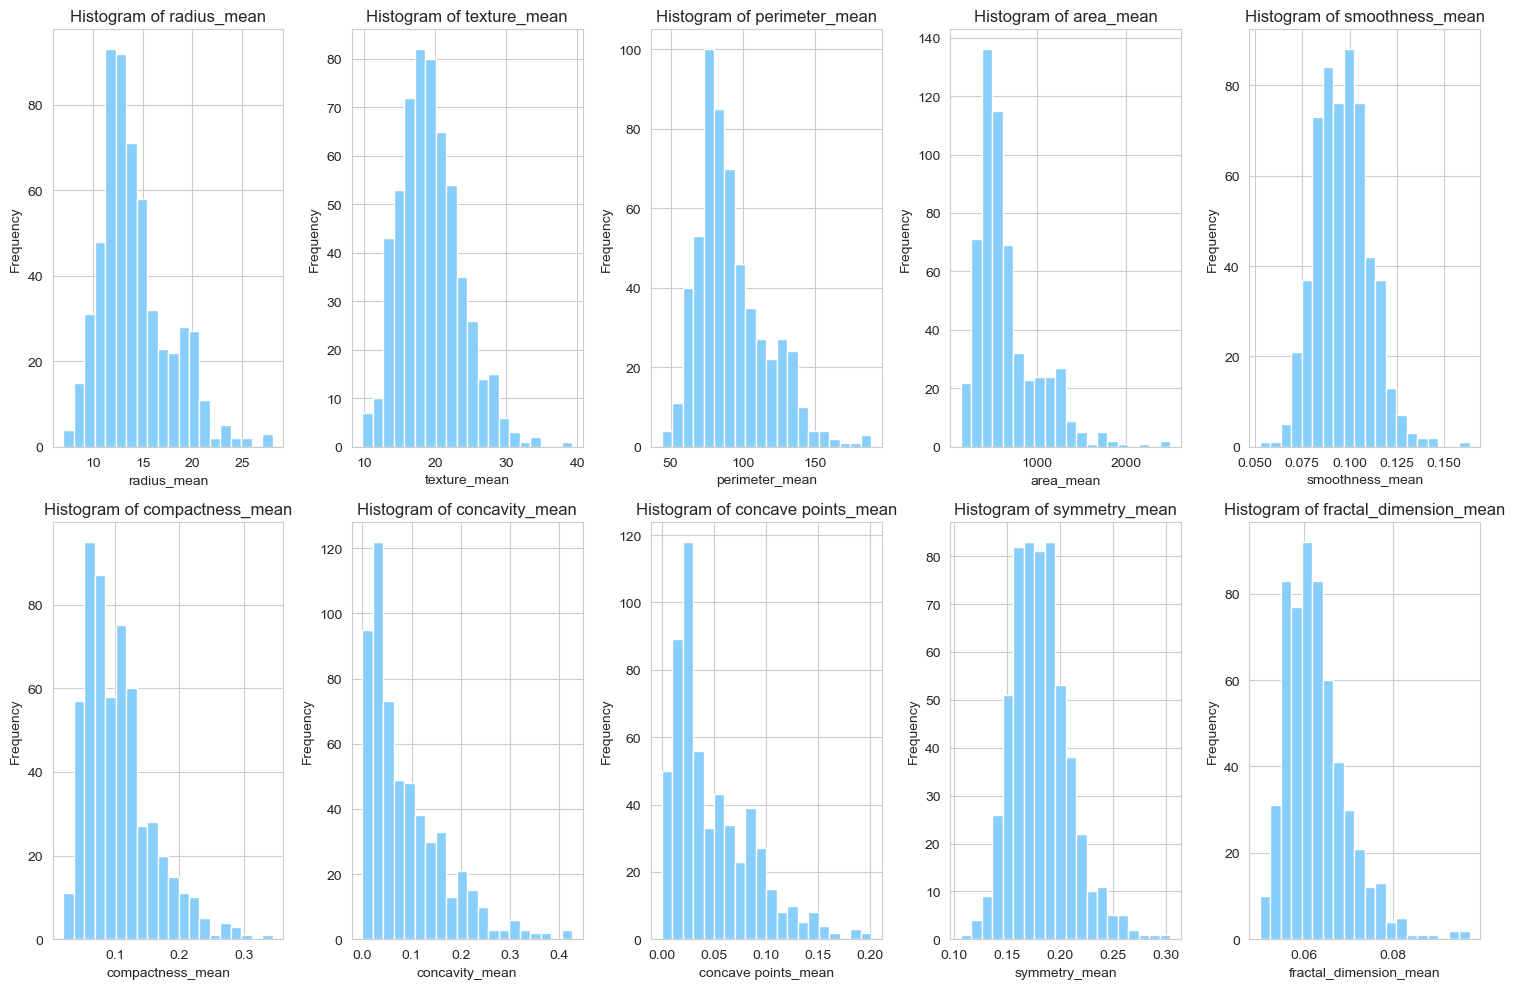

In [71]:
#2.Esplorazione della  distribuzione dei dati del DataSet.
#O meglio, verifico se i dati seguono una distribuzione normale (a campana) 
#o se sono distribuiti in modo asimmetrico ed identifico eventuali valori anomali o "outlier".
#Con il comando 'hist'.

#VARIABILI NUMERICHE

import math

#Seleziono solo le colonne numeriche
df_num = df_BreastCancer.select_dtypes(include=['float64', 'int64'])

#Numero di colonne per blocco
num_cols = 5

#Blocco 1 - prime 10 colonne
cols_block1 = df_num.columns[:10]
num_plots_block1 = len(cols_block1)
num_rows_block1 = math.ceil(num_plots_block1 / num_cols)

#Creo la griglia di plot per il blocco 1
fig1, axs1 = plt.subplots(num_rows_block1, num_cols, figsize=(15, 5*num_rows_block1))

# Riavvolgo l'indice degli assi per poter accedere agli elementi della griglia
axs1 = axs1.ravel()

#Creo un istogramma per ogni colonna numerica del blocco 1
for i, col in enumerate(cols_block1):
    axs1[i].hist(df_num[col], bins=20, color='lightskyblue')
    axs1[i].set_title(f"Histogram of {col}")
    axs1[i].set_xlabel(col)
    axs1[i].set_ylabel("Frequency")

#Nascondo gli assi non utilizzati e mostro il plot
for i in range(num_plots_block1, num_cols*num_rows_block1):
    axs1[i].axis("off")
    
plt.tight_layout()
plt.show()


#DA CONSIDERARE
#Le variabili (features) 'radius_mean', 'texture_mean' e 'area_mean' sono spesso utilizzate come 
#indicatori primari di diagnostica del tumore al seno. Ad esempio:
#                 1. radius_mean: ovvero il raggio medio delle cellule del tumore al seno;
#                 2. taxture_mean: metodo di misurazione della consistenza delle cellule tumorali;
#                 3. area_mean: ovvero l'area media delle cellule.




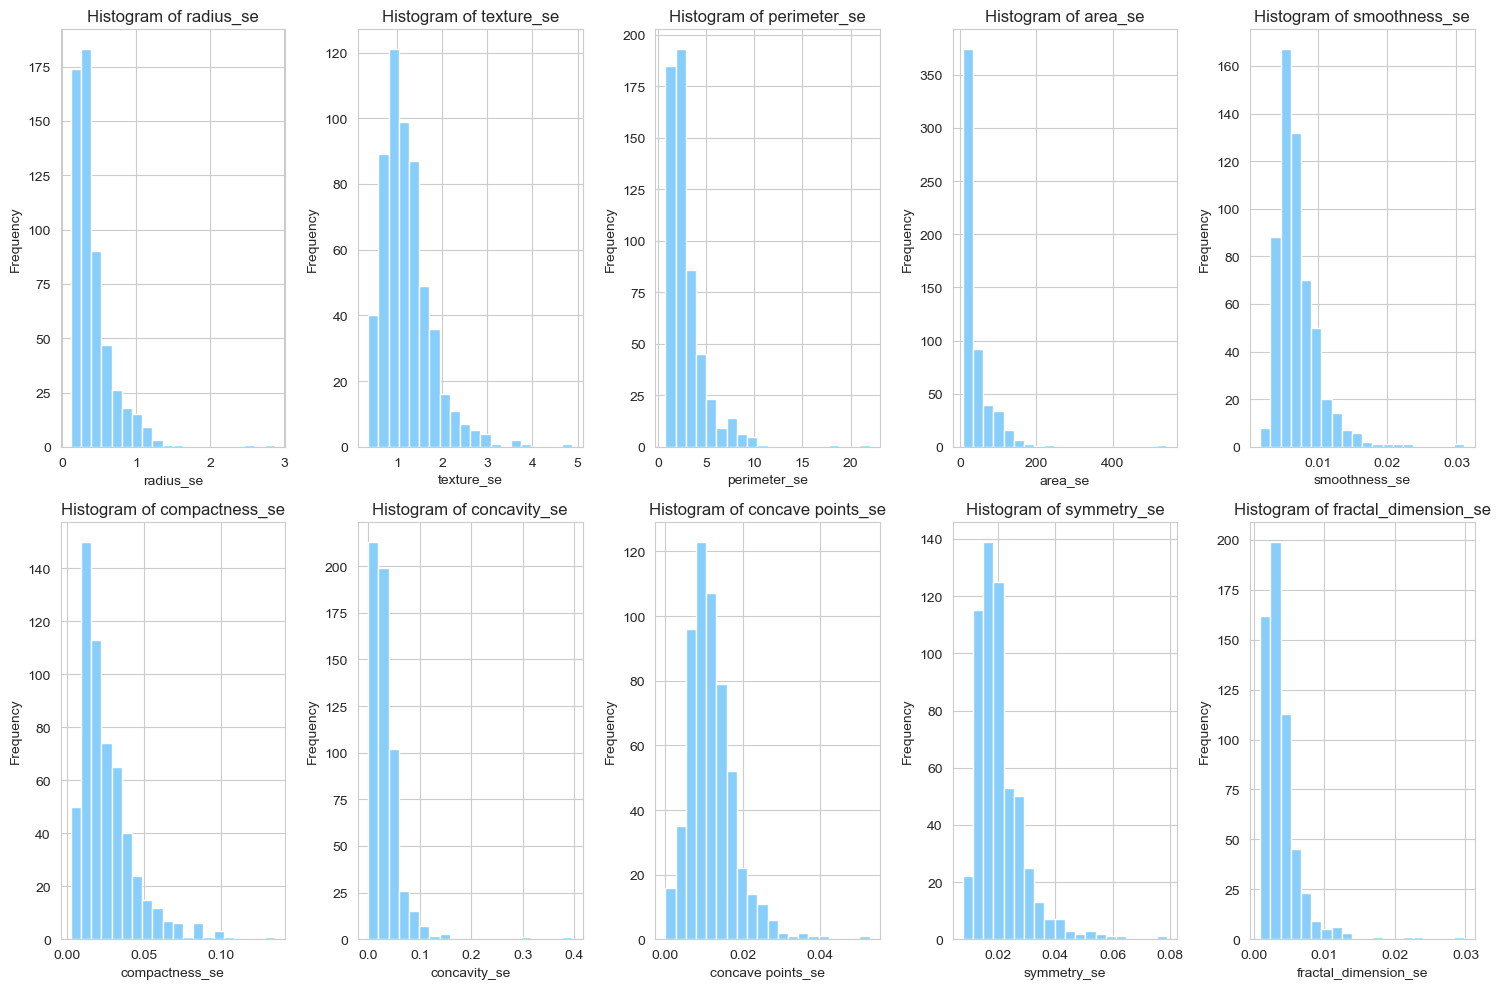

In [72]:
#Blocco 2 - seconde 10 colonne
cols_block2 = df_num.columns[10:20]
num_plots_block2 = len(cols_block2)
num_rows_block2 = math.ceil(num_plots_block2 / num_cols)

#Creo la griglia di plot per il blocco 2
fig2, axs2 = plt.subplots(num_rows_block2, num_cols, figsize=(15, 5*num_rows_block2))

#Riavvolgo l'indice degli assi per poter accedere agli elementi della griglia
axs2 = axs2.ravel()

#Creo un istogramma per ogni colonna numerica del blocco 2
for i, col in enumerate(cols_block2):
    axs2[i].hist(df_num[col], bins=20, color='lightskyblue')
    axs2[i].set_title(f"Histogram of {col}")
    axs2[i].set_xlabel(col)
    axs2[i].set_ylabel("Frequency")

#Nascondo gli assi non utilizzati e mostro il plot
for i in range(num_plots_block2, num_cols*num_rows_block2):
    axs2[i].axis("off")
    
plt.tight_layout()
plt.show()

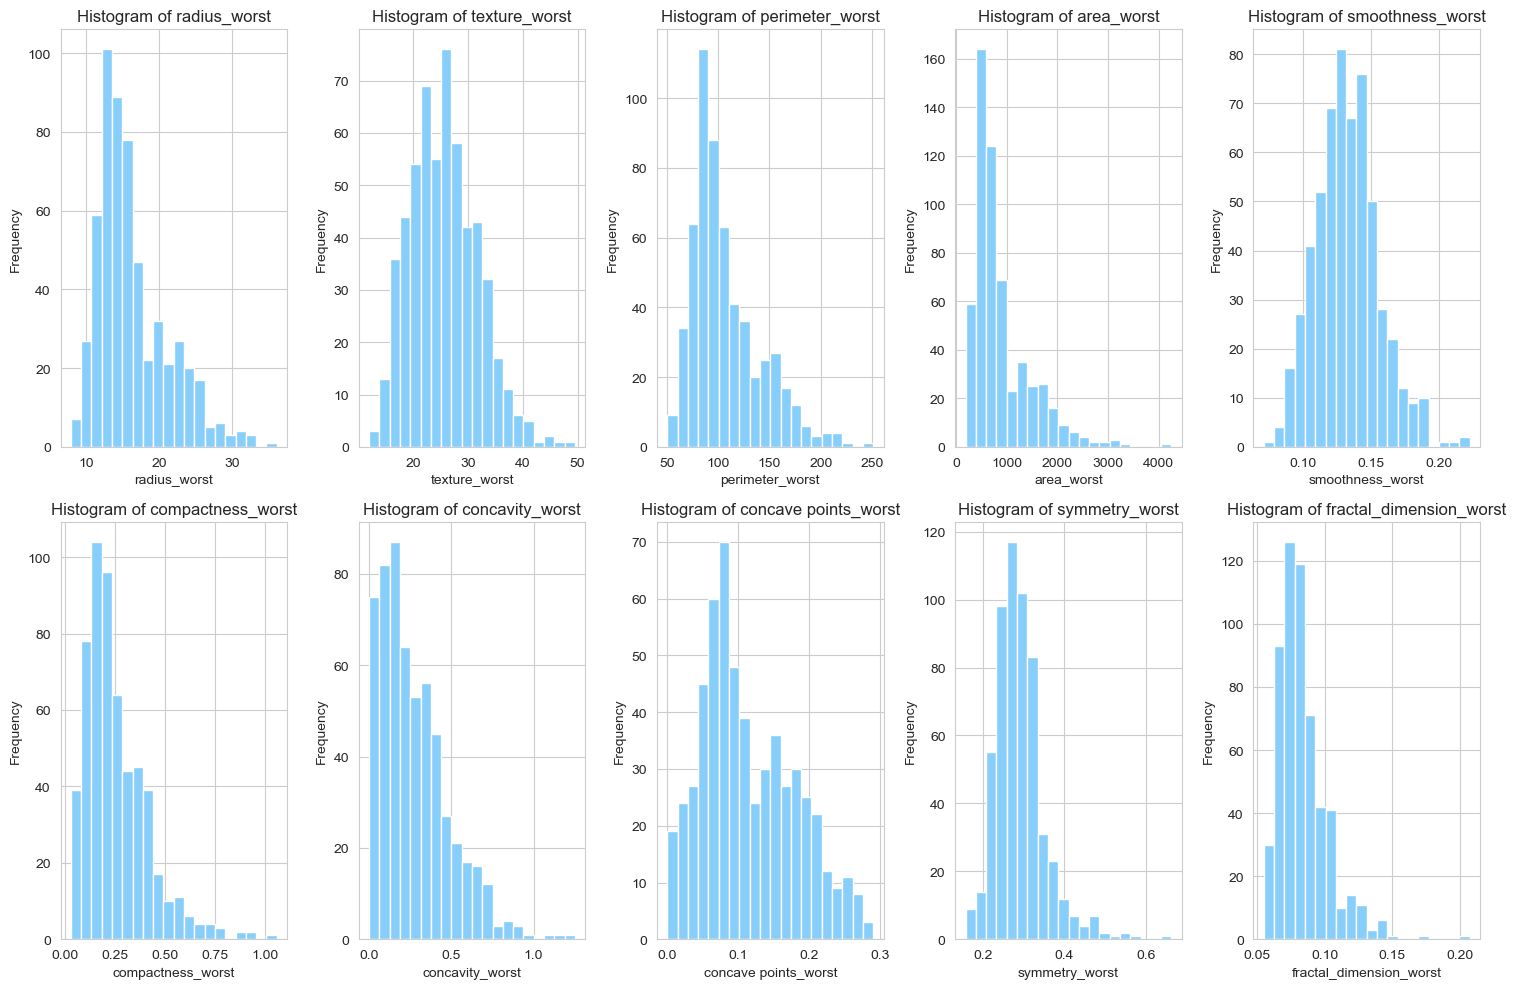

In [73]:
#Blocco 3 - terze 10 colonne
cols_block3 = df_num.columns[20:30]
num_plots_block3 = len(cols_block3)
num_rows_block3 = math.ceil(num_plots_block3 / num_cols)

#Creo la griglia di plot per il blocco 3
fig3, axs3 = plt.subplots(num_rows_block3, num_cols, figsize=(15, 5*num_rows_block3))

#Riavvolgo l'indice degli assi per poter accedere agli elementi della griglia
axs3 = axs3.ravel()

#Creo un istogramma per ogni colonna numerica del blocco 2
for i, col in enumerate(cols_block3):
    axs3[i].hist(df_num[col], bins=20, color='lightskyblue')
    axs3[i].set_title(f"Histogram of {col}")
    axs3[i].set_xlabel(col)
    axs3[i].set_ylabel("Frequency")

#Nascondo gli assi non utilizzati e mostro il plot
for i in range(num_plots_block3, num_cols*num_rows_block3):
    axs3[i].axis("off")
    
plt.tight_layout()
plt.show()

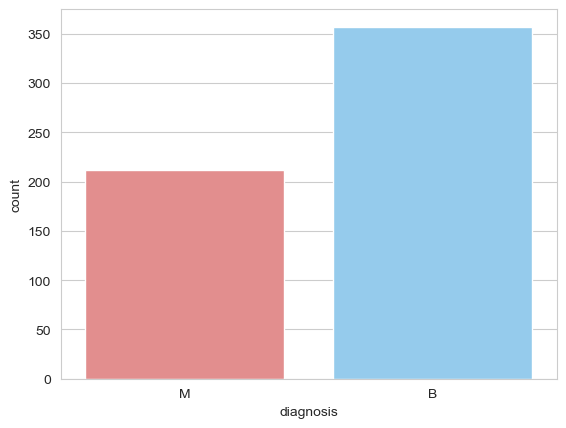

In [74]:
#VARIABILE CATEGORICA
#Esploro le distribuzioni dell'unica variabile categorica (target)

#Dato che è categorica utilizzo a barre
sns.countplot(data=df_BreastCancer, x='diagnosis', palette=['lightcoral', 'lightskyblue'])
plt.show()

In [75]:
#La variabile categorica presenta valori 'M' (maligno), ed 'B' (benigno), quindi la trasformo
#in numerica con questa associazione: M=1 ed B=0
df_BreastCancer['diagnosis'] = df_BreastCancer['diagnosis'].map({'M': 1, 'B': 0})

In [76]:
#Per Verificare se i dati seguono una distribuzione normale utilizzo il test di normalità 
#di Shapiro-Wilk, confrontando i dati con la curva di una distribuzione normale.
from scipy.stats import shapiro

stat, p = shapiro(df_BreastCancer)
print('Statistiche del test=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('I dati seguono una distribuzione normale')
else:
    print('I dati non seguono una distribuzione normale')


#Se il p-value restituito dal test è inferiore al livello di significatività (alpha), allora
#si può rigettare l'ipotesi nulla (H0) che i dati seguano una distribuzione normale. Altrimenti,
#non si può rigettare l'ipotesi nulla e si può assumere che i dati seguano una distribuzione 
#normale.

#In questo caso, le distribuzioni delle variabili numeriche del DataSet NON seguono 
#una distribuzione normale quinidi, non è Gaussiana (o a campana), quindi la distribuzione
#può essere asimmetrica o avere code più lunghe rispetto a una distribuzione normale.


Statistiche del test=0.289, p-value=0.000
I dati non seguono una distribuzione normale


c:\Users\elisa ravagnan\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [77]:
#Verifico se le colonne presentano outliers con il metodo di Tukey
#Calcolo i limiti per ogni colonna
q1 = df_BreastCancer.quantile(0.25)
q3 = df_BreastCancer.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

#Calcolo il numero di outlier per ogni colonna
num_outliers = ((df_BreastCancer < lower_bound) | (df_BreastCancer > upper_bound)).sum()

#Stampo il risultato
print(num_outliers)

#Solamente 'diagnosis' ed 'concave points_worst' non presentano outliers


diagnosis                   0
radius_mean                14
texture_mean                7
perimeter_mean             13
area_mean                  25
smoothness_mean             6
compactness_mean           16
concavity_mean             18
concave points_mean        10
symmetry_mean              15
fractal_dimension_mean     15
radius_se                  38
texture_se                 20
perimeter_se               38
area_se                    65
smoothness_se              30
compactness_se             28
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
radius_worst               17
texture_worst               5
perimeter_worst            15
area_worst                 35
smoothness_worst            7
compactness_worst          16
concavity_worst            12
concave points_worst        0
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64


1. Misurazione di un eventuale sbilanciamento del dataset rispetto al target e rappresentarlo
con un grafico a barre o a torta

In [78]:
#Calcolo la frequenza di ogni classe
class_freq = df_BreastCancer['diagnosis'].value_counts()

#Calcolo il fattore di sbilanciamento che è  il rapporto tra la classe 
#meno frequente e quella più frequente
imbalance_factor = class_freq.min() / class_freq.max()
print("Fattore di sbilanciamento:", imbalance_factor)

Fattore di sbilanciamento: 0.5938375350140056


In [79]:
sbilanciamento = 0.59

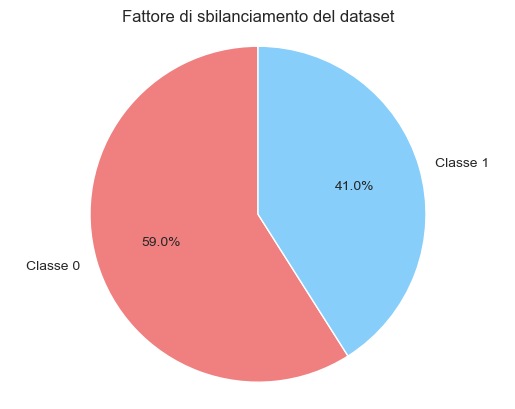

In [80]:
#1.Rappresentazione del sbilanciamento con un grafico a torta
labels = ['Classe 0', 'Classe 1']
sizes = [sbilanciamento, 1 - sbilanciamento]
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Fattore di sbilanciamento del dataset')
plt.show()



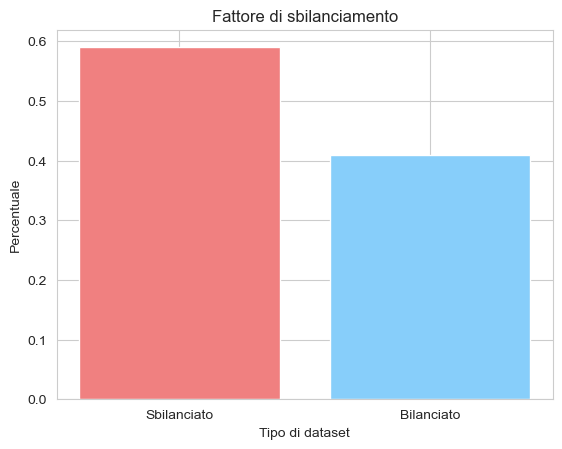

In [81]:
#2.Rappresentazione del sbilanciamento con un grafico a barre
labels = ['Sbilanciato', 'Bilanciato']
values = [sbilanciamento, 1 - sbilanciamento]
colori = ['lightcoral', 'lightskyblue']

plt.bar(labels, values, color=colori)
plt.title('Fattore di sbilanciamento')
plt.xlabel('Tipo di dataset')
plt.ylabel('Percentuale')
plt.show()



#Il Fattore di sbilanciamento è 0.5938375350140056 significa che il DataSet è sbilanciato,
#ovvero che la distribuzione dei valori target non è equilibrata. In questo caso, 
#la classe 0 rappresenta la maggioranza, quindi il DataSet è definito come sbilanciato in favore 
#della classe 0.  Quindi, il modello di machine learning, potrebbe imparare a predire 
#correttamente solo la classe maggioritaria e non quella minoritaria, 
#portando ad una performance scarsa nella generalizzazione su nuovi dati.

2. Calcolo della matrice di correlazione e riordinamento delle features secondo le più correlate al target

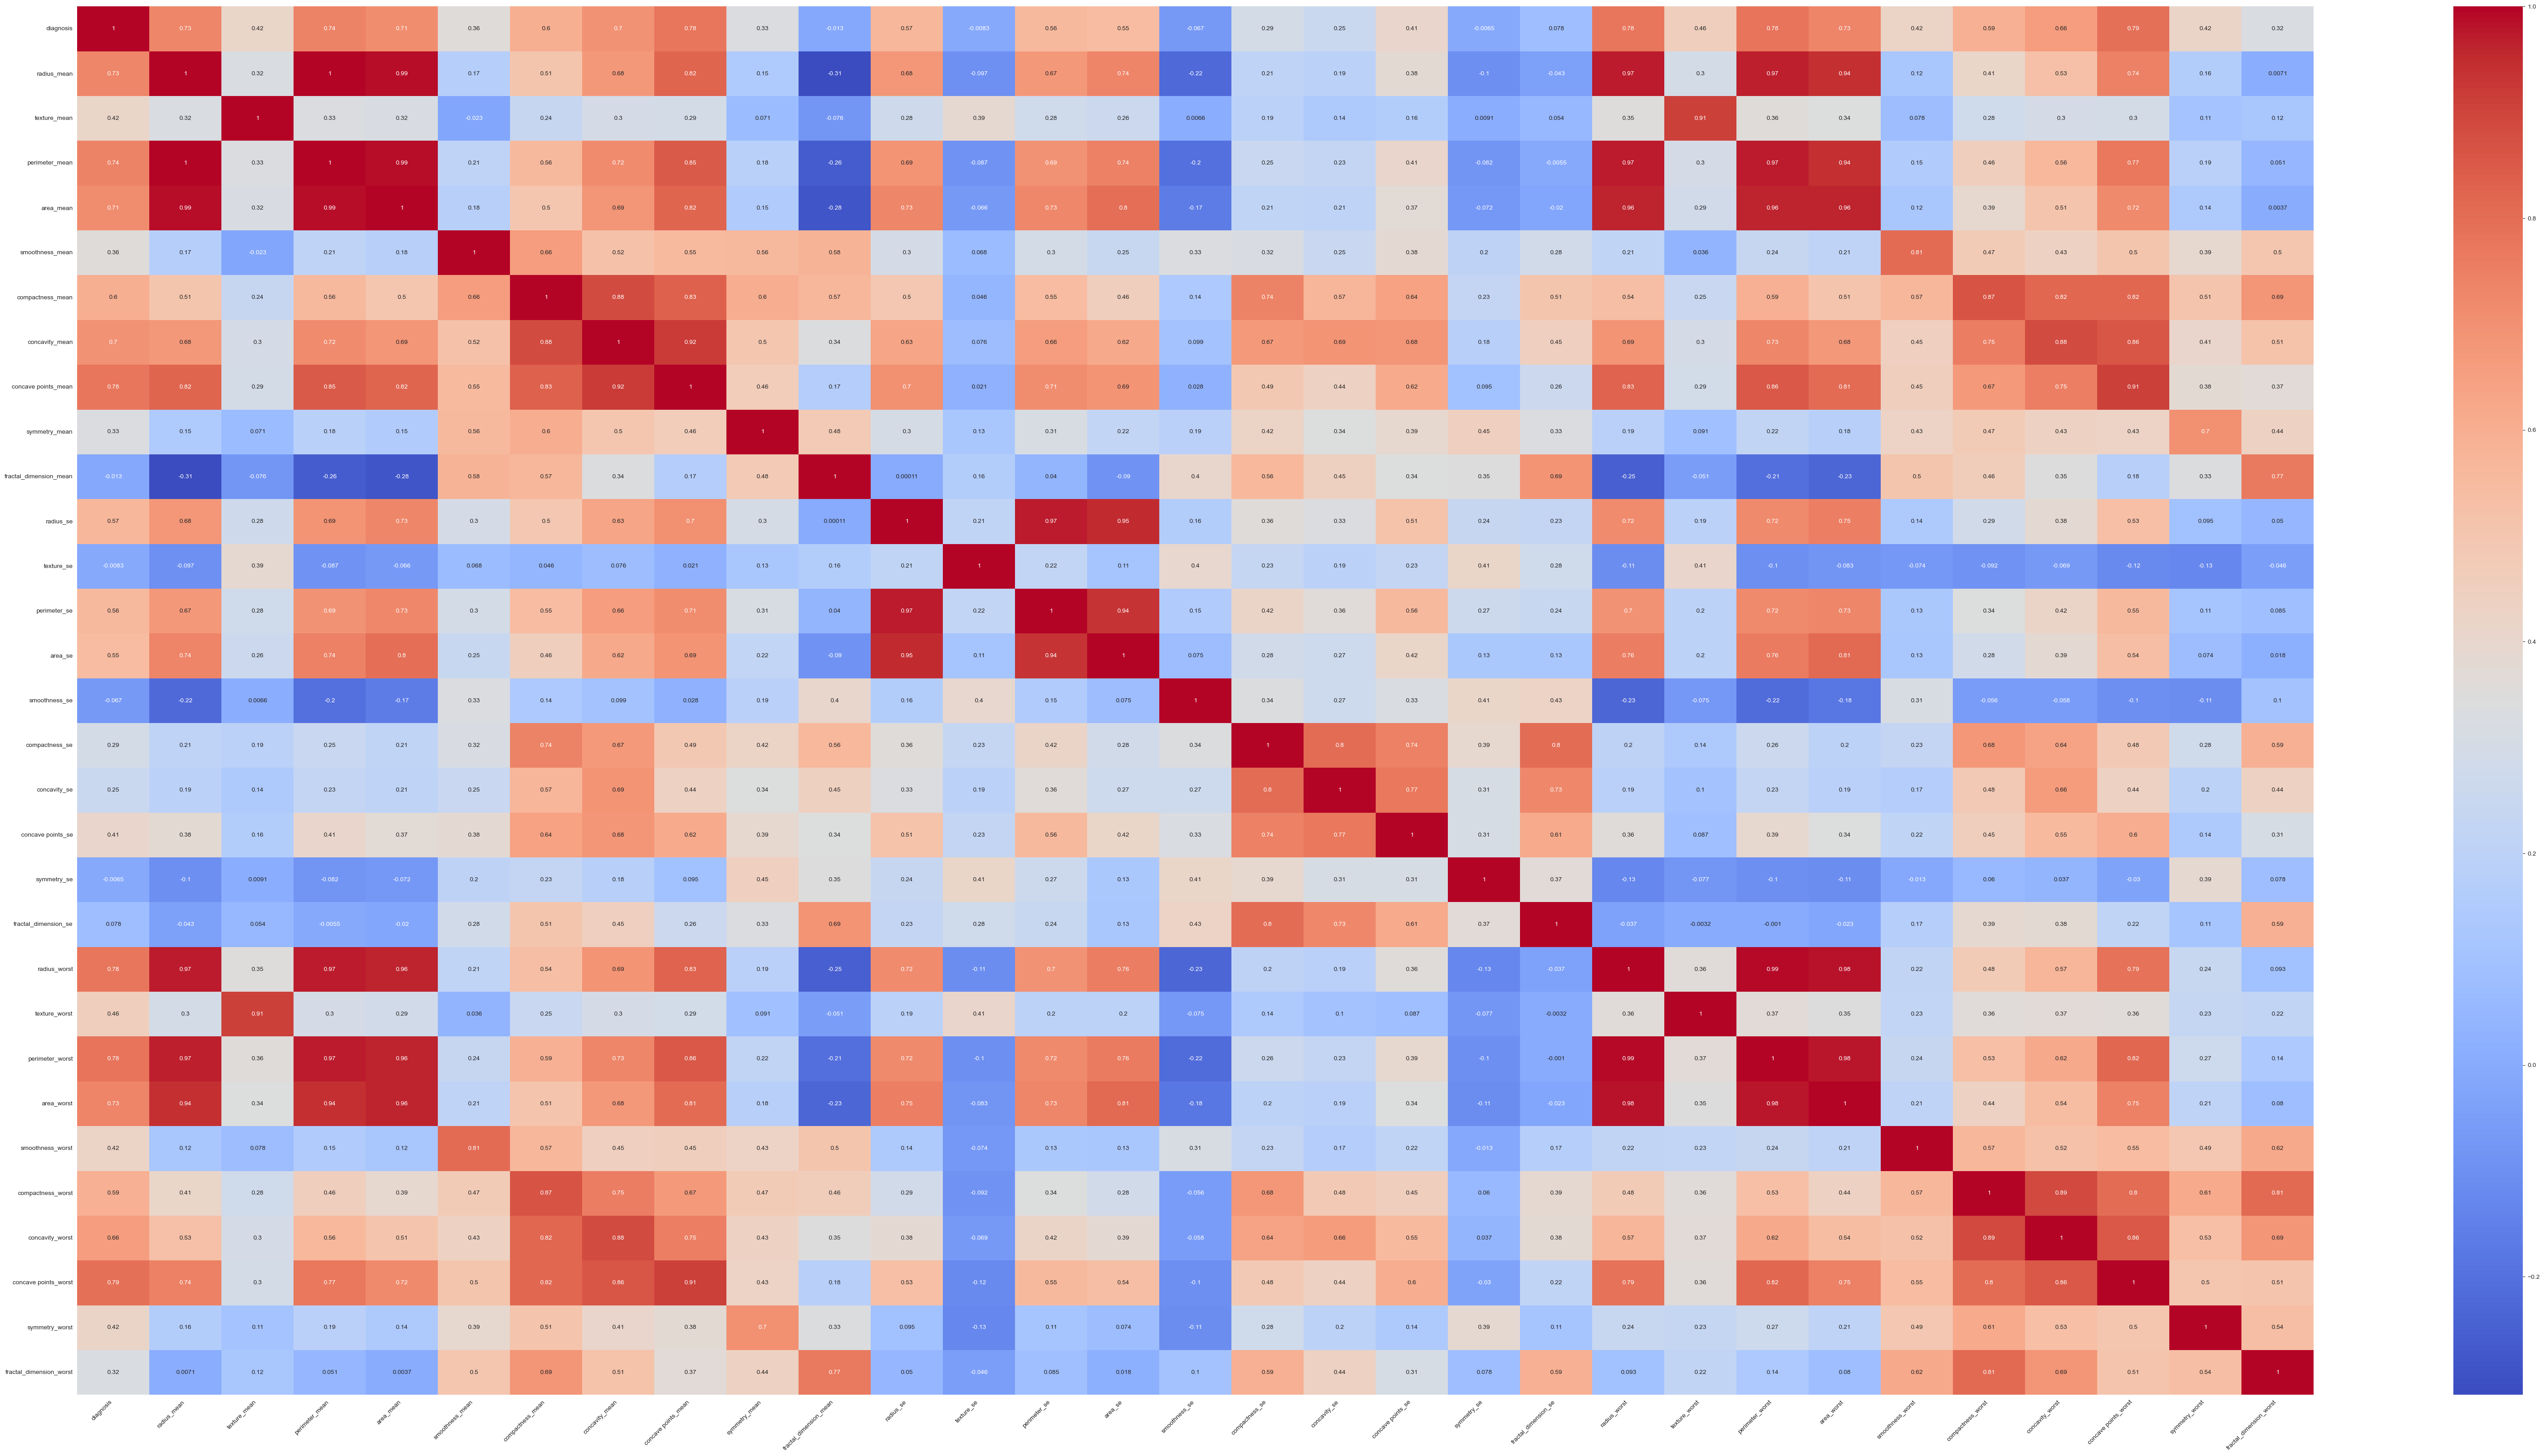

In [82]:
#Esaminazione le correlazioni tra le variabili
#Calcolo le correlazioni tra le colonne numeriche del dataframe
corr_matrix = df_BreastCancer.corr()

#Disegno il grafico delle correlazioni
fig, ax = plt.subplots(figsize=(80, 40))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)

#Ruoto le etichette dell'asse x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

#Correlazione tra le varie features rispetto il target 'diagnosis'
#DIAGNOSIS:
            #radius_mean: 0.73                
            #texture_mean: 0.42              
            #perimeter_mean: 0.74             
            #area_mean: 0.71                   
            #smoothness_mean: 0.36           
            #compactness_mean: 0.60                  
            #concavity_mean: 0.70              
            #concave points_mean: 0.78         
            #symmetry_mean: 0.33             
            #fractal_dimension_mean: -0.01   
            #radius_se: 0.57                  
            #texture_se: -0.01               
            #perimeter_se: 0.56               
            #area_se: 0.55                      
            #smoothness_se: -0.07            
            #compactness_se: 0.29            
            #concavity_se: 0.25              
            #concave points_se: 0.41          
            #symmetry_se: -0.01              
            #fractal_dimension_se: 0.08      
            #radius_worst: 0.78                
            #texture_worst: 0.46              
            #perimeter_worst: 0.78             
            #area_worst: 0.73                      
            #smoothness_worst: 0.42           
            #compactness_worst: 0.59           
            #concavity_worst: 0.66             
            #concave points_worst: 0.79         
            #symmetry_worst: 0.42              
            #fractal_dimension_worst: 0.32     
        

          
                                                        

         

                                                       

In [83]:
#Creo un ulteriore DataFrame indicando l'ordine di tutte le features correlate al target 'diagnosis' dalla più
#correlata alla meno correlata con i loro valori di correlazione al target. Ad esempio, la feature 'concave points_worst'
#è correlata al 0.79 al target. 

#Creo una lista di valori
valori = [[1, 'concave points_worst', 0.79], [2, 'concave points_mean', 0.78], [3, 'radius_worst', 0.78],
          [4, 'perimeter_worst', 0.78], [5, 'perimeter_mean', 0.74], [6, 'radius_mean', 0.73],
          [7, 'area_worst', 0.73], [8, 'area_mean', 0.71], [9, 'concavity_mean', 0.70],
          [10, 'concavity_worst', 0.66], [11, 'compactness_mean', 0.60], [12, 'compactness_worst', 0.59], 
          [13, 'radius_se', 0.57], [14, 'perimeter_se', 0.56], [15, 'area_se', 0.55],
          [16, 'texture_worst', 0.46], [17, 'smoothness_worst', 0.42], [18, 'symmetry_worst', 0.42],
          [19, 'texture_mean', 0.42], [20, 'concave points_se', 0.41], [21, 'smoothness_mean', 0.36],
          [22, 'symmetry_mean', 0.33], [23, 'fractal_dimension_worst', 0.32], [24, 'compactness_se', 0.29],
          [25, 'concavity_se', 0.25], [26, 'fractal_dimension_se', 0.08], [27, 'fractal_dimension_mean', -0.01],
          [28, 'texture_se', -0.01], [29, 'symmetry_se', -0.01], [30, 'smoothness_se', -0.07]]

#Creo il DataFrame 
df_features_corr_target = pd.DataFrame(valori, columns=['id', 'feature', 'correlazione'])
df_features_corr_target = df_features_corr_target.set_index('id')
df_features_corr_target

,feature,correlazione
id,,
1,concave points_worst,0.79
2,concave points_mean,0.78
3,radius_worst,0.78
4,perimeter_worst,0.78
5,perimeter_mean,0.74
6,radius_mean,0.73
7,area_worst,0.73
8,area_mean,0.71
9,concavity_mean,0.70


In [84]:
#Riordino, ulteriormente, il DataFrame originale tenendo come prima colonna il target 'diagnosis' ed mettendo
#le altre features dalla più correlata alla meno di quest'ultima

#Copio il DataFrame originale
df_BreastCancer_features_riordinate = df_BreastCancer.copy()
 

In [85]:
df_BreastCancer_features_riordinate

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [86]:
#Riordino le colonne nel DataFrame appena copiato

#Creo una lista con l'ordine desiderato delle colonne
new_order = ['diagnosis', 'concave points_worst', 'concave points_mean', 'radius_worst', 'perimeter_worst',
             'perimeter_mean', 'radius_mean', 'area_worst', 'area_mean', 'concavity_mean', 'concavity_worst',
             'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se', 'area_se', 'texture_worst', 
             'smoothness_worst', 'symmetry_worst', 'texture_mean', 'concave points_se', 'smoothness_mean',
             'symmetry_mean', 'fractal_dimension_worst', 'compactness_se', 'concavity_se', 'fractal_dimension_se',
             'fractal_dimension_mean', 'texture_se', 'symmetry_se', 'smoothness_se']

#Applico il nuovo ordine alle colonne del dataframe
df_BreastCancer_features_riordinate = df_BreastCancer_features_riordinate.reindex(columns=new_order)
df_BreastCancer_features_riordinate

,diagnosis,concave points_worst,concave points_mean,radius_worst,perimeter_worst,perimeter_mean,radius_mean,area_worst,area_mean,concavity_mean,...,smoothness_mean,symmetry_mean,fractal_dimension_worst,compactness_se,concavity_se,fractal_dimension_se,fractal_dimension_mean,texture_se,symmetry_se,smoothness_se
0,1,0.2654,0.14710,25.380,184.60,122.80,17.99,2019.0,1001.0,0.30010,...,0.11840,0.2419,0.11890,0.04904,0.05373,0.006193,0.07871,0.9053,0.03003,0.006399
1,1,0.1860,0.07017,24.990,158.80,132.90,20.57,1956.0,1326.0,0.08690,...,0.08474,0.1812,0.08902,0.01308,0.01860,0.003532,0.05667,0.7339,0.01389,0.005225
2,1,0.2430,0.12790,23.570,152.50,130.00,19.69,1709.0,1203.0,0.19740,...,0.10960,0.2069,0.08758,0.04006,0.03832,0.004571,0.05999,0.7869,0.02250,0.006150
3,1,0.2575,0.10520,14.910,98.87,77.58,11.42,567.7,386.1,0.24140,...,0.14250,0.2597,0.17300,0.07458,0.05661,0.009208,0.09744,1.1560,0.05963,0.009110
4,1,0.1625,0.10430,22.540,152.20,135.10,20.29,1575.0,1297.0,0.19800,...,0.10030,0.1809,0.07678,0.02461,0.05688,0.005115,0.05883,0.7813,0.01756,0.011490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.2216,0.13890,25.450,166.10,142.00,21.56,2027.0,1479.0,0.24390,...,0.11100,0.1726,0.07115,0.02891,0.05198,0.004239,0.05623,1.2560,0.01114,0.010300
565,1,0.1628,0.09791,23.690,155.00,131.20,20.13,1731.0,1261.0,0.14400,...,0.09780,0.1752,0.06637,0.02423,0.03950,0.002498,0.05533,2.4630,0.01898,0.005769
566,1,0.1418,0.05302,18.980,126.70,108.30,16.60,1124.0,858.1,0.09251,...,0.08455,0.1590,0.07820,0.03731,0.04730,0.003892,0.05648,1.0750,0.01318,0.005903
567,1,0.2650,0.15200,25.740,184.60,140.10,20.60,1821.0,1265.0,0.35140,...,0.11780,0.2397,0.12400,0.06158,0.07117,0.006185,0.07016,1.5950,0.02324,0.006522


BONUS -> giustificazione delle eventuali correlazioni forti fra le features

In [87]:
#La massima correlazione positiva tra le varie features (dal 0.90 in su), non tenendo in considerazione il target
#Le varie features sono, di base, correlate tra se stesse
#CORR. POS. ---> CORRELAZIONE POSITIVA
        
         #radius_mean CORR. POS. : .perimeter_mean                  1.0
         #                         .area_mean                       0.99
         #                         .radius_worst                    0.97
         #                         .perimeter_worst                 0.97
         #                         .area_worst                      0.94

         #texture_mean CORR. POS. :   .texture_worst                0.91
         
         #perimeter_mean CORR. POS. : .radius_mean                   1.0
         #                            .area_mean                     0.99
         #                            .radius_worst                  0.97
         #                            .perimeter_worst               0.97
         #                            .area_worst                    0.94
         
         #area_mean CORR. POS. :      .radius_mean                    0.99
         #                            .perimeter_mean                 0.99
         #                            .radius_worst                   0.96
         #                            .perimeter_worst                0.96
         #                            .area_worst                     0.96

         #smoothness_mean CORR. POS. : MINIMA CORR. 
         
         #compactness_mean CORR. POS.: MINIMA CORR.
          
         #concavity_mean CORR. POS.  : .concave points_mean            0.92

         #concave points_mean CORR. POS.  : .concavity_mean            0.92
         #                                  .concave points_worst      0.91
         
         #symmetry_mean CORR. POS.  :     MINIMA CORR. 
         
         #fractal_dimension_mean CORR. POS.  :     MINIMA CORR.
          
         #radius_se CORR. POS.  :     .perimeter_se                    0.97 
         #                            .area_se                         0.95
         
         #texture_se CORR. POS.  :   MINIMA CORR.

         #perimeter_se CORR. POS.  :   .radius_se                      0.97   
         #                             .area_se                        0.94

         #area_se CORR. POS.       :   .radius_se                      0.95
         #                             .perimeter_se                   0.94

         #smoothness_se CORR. POS. :   MINIMA CORR.

         #compactness_se CORR. POS.:   MINIMA CORR.

         #concavity_se CORR. POS.:   MINIMA CORR.

         #concave points_se CORR. POS.:   MINIMA CORR.

         #symmetry_se CORR. POS.:   MINIMA CORR.

         #fractal_dimension_se CORR. POS.:   MINIMA CORR.

         #radius_worst CORR. POS.:   .radius_mean                       0.97
         #                           .perimeter_mean                    0.97
         #                           .area_mean                         0.96
         #                           .perimeter_worst                   0.99
         #                           .area_worst                        0.98
         
         #texture_worst CORR. POS.:  .texture_mean                      0.91
         
         #perimeter_worst CORR. POS.: .radius_mean                      0.97
         #                            .perimeter_mean                   0.97
         #                            .area_mean                        0.96
         #                            .area_worst                       0.98

         #area_worst      CORR. POS.: .radius_mean                      0.94
         #                            .perimeter_mean                   0.94
         #                            .area_mean                        0.96
         #                            .radius_worst                     0.98
         #                            .perimeter_worst                  0.98  
         
         #smoothness_worst CORR. POS.: MINIMA CORR.
         
         #compactness_worst CORR. POS. : MINIMA CORR.

         #concavity_worst CORR. POS. : MINIMA CORR.

         #concave points_worst CORR. POS. : .concave points_mean         0.91  

         #symmetry_worst CORR. POS. :       MINIMA CORR.

         #fractal_dimension_worst CORR. POS. :       MINIMA CORR. 


#CONSIDERAZIONI
#1.La feature 'radius_mean', cui ha massima correlazione con 'perimeter_mean', 'area_mean', 'radius_worst',  
#'perimeter_worst' ed 'area_worst', ha gli stessi identici valori di correlazione di 'perimeter_mean' che ha 
#massima correlazione con 'radius_mean', 'area_mean', 'radius_worst', 'perimeter_worst' ed 'area_worst'. Ciò significa
#che le due feature 'radius_mean' e 'perimeter_mean' hanno una forte associazione con le altre feature cioè
#se una di queste feature aumenta, c'è una forte probabilità che anche le altre aumentino, e viceversa quando 
#una diminuisce, c'è una forte probabilità che anche le altre diminuiscano. Quindi, queste features possono essere
#ridondanti e che potrebbe essere possibile rimuovere una o più di esse senza perdere troppa informazione.  

#2.Le features cui ho segnato (MINIMA CORR.) sono quelle cui non presentano la massima correlazione con nessuna 
#feature (più del 0.90)                                                                                                                                      
       

In [88]:
#Funzione per trovare la correlazione tra due faetures
'''correlation = df_BreastCancer['concave points_worst'].corr(df_BreastCancer['concave points_mean'])
correlation = round(correlation, 2)
correlation'''

"correlation = df_BreastCancer['concave points_worst'].corr(df_BreastCancer['concave points_mean'])\ncorrelation = round(correlation, 2)\ncorrelation"

3. Valutazione se aggiungere features addizionali date dall’interazione di features esistenti o dal loro sviluppo 
polinomiale

In [89]:
#Innanzitutto, bisogna determinare se le features attuali sono sufficienti o se aggiungere altre feature 
#migliorerà significativamente prestazioni. Quindi, bisogna provare ad addestrare il modello utilizzando 
#solo le features attuali e valutare le sue prestazioni utilizzando metriche appropriate come 
#l'accuratezza, la precisione, la recall e l'F1 score. 
#Se le prestazioni del modello non soddisfano i requisiti, allora bisogna provare ad aggiungere altre feature.
#In questo caso uso il LogisticRegression

In [90]:
#Prima di tutto, dato che la maggiorparte delle colonne presentano outliers, è necessario normalizzare il DataSet
#per avere media 0 e varianza unitaria e, di conseguenza, procedere al modello

#Ho usato il modello LogisticRegression
df_BreastCancer_riordinate_norm = df_BreastCancer_features_riordinate.copy()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, precision_recall_curve, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

#Definisco la funzione per normalizzare i dati e suddividere il dataset (necessaria per essere richiamata 
#successiavemente)

def split_normalize_data(df_BreastCancer_riordinate_norm):
      #Divido il DataSet in set di addestramento e set di test
      X_train, X_test, y_train, y_test = train_test_split(df_BreastCancer_riordinate_norm.drop('diagnosis', axis=1), df_BreastCancer_riordinate_norm['diagnosis'], test_size=0.2, random_state=42)
      #Creo l'oggetto scaler
      scaler = MinMaxScaler()
      #Normalizzo le feature nel set di addestramento
      X_train = scaler.fit_transform(X_train)
      #Normalizzo le feature nel set di test
      X_test = scaler.transform(X_test)
      return X_train, X_test, y_train, y_test


In [91]:
#Chiamata della funzione
X_train, X_test, y_train, y_test = split_normalize_data(df_BreastCancer_riordinate_norm)

#Addestro il modello di Logistic Regression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

#Utilizzo il modello addestrato per effettuare le previsioni sul set di test
y_pred = clf.predict(X_test)

#Calcolo le metriche di valutazione delle prestazioni
accuracylr = accuracy_score(y_test, y_pred)
precisionlr = precision_score(y_test, y_pred)
recalllr = recall_score(y_test, y_pred)
f1lr = f1_score(y_test, y_pred)

print("Accuracy: ", accuracylr)
print("Precision: ", precisionlr)
print("Recall: ", recalllr)
print("F1 score: ", f1lr)

#Siccome i risultati risultano abbastanza buoni. Non è necessario aggiungere nuove features addizionali in quanto
#con quelle già attuali sono sufficienti nell'ambito delle prestazioni.

Accuracy:  0.9824561403508771
Precision:  1.0
Recall:  0.9534883720930233
F1 score:  0.9761904761904763


4. Per le 10 features più correlate calcolo della media, mediana, moda, deviazione standard e graficarne la
distribuzione

In [92]:
#Nell'ambito di quanto già effettuato prima, nel seguente DataFrame sono indicate le prime 10 features tra le più
#correlate al target 'diagnosis'
df_features_corr_target10 = df_features_corr_target.copy()
df_features_corr_target10 = df_features_corr_target10.head(10)
df_features_corr_target10

,feature,correlazione
id,,
1,concave points_worst,0.79
2,concave points_mean,0.78
3,radius_worst,0.78
4,perimeter_worst,0.78
5,perimeter_mean,0.74
6,radius_mean,0.73
7,area_worst,0.73
8,area_mean,0.71
9,concavity_mean,0.70


In [93]:
#Dopo aver compreso bene quali features siano le più correlate bisogna calcolare media, mediana, moda e deviazione
#standard dal DataFrame df_BreastCancer_features_riordinate

#Media
media_concave_points_worst = df_BreastCancer_features_riordinate['concave points_worst'].mean()
media_concave_points_mean = df_BreastCancer_features_riordinate['concave points_mean'].mean()
media_radius_worst = df_BreastCancer_features_riordinate['radius_worst'].mean()
media_perimeter_worst = df_BreastCancer_features_riordinate['perimeter_worst'].mean()
media_perimeter_mean = df_BreastCancer_features_riordinate['perimeter_mean'].mean()
media_radius_mean = df_BreastCancer_features_riordinate['radius_mean'].mean()
media_area_worst = df_BreastCancer_features_riordinate['area_worst'].mean()
media_area_mean = df_BreastCancer_features_riordinate['area_mean'].mean()
media_concavity_mean = df_BreastCancer_features_riordinate['concavity_mean'].mean()
media_concavity_worst = df_BreastCancer_features_riordinate['concavity_worst'].mean()

#Mediana
mediana_concave_points_worst = df_BreastCancer_features_riordinate['concave points_worst'].median()
mediana_concave_points_mean = df_BreastCancer_features_riordinate['concave points_mean'].median()
mediana_radius_worst = df_BreastCancer_features_riordinate['radius_worst'].median()
mediana_perimeter_worst = df_BreastCancer_features_riordinate['perimeter_worst'].median()
mediana_perimeter_mean = df_BreastCancer_features_riordinate['perimeter_mean'].median()
mediana_radius_mean = df_BreastCancer_features_riordinate['radius_mean'].median()
mediana_area_worst = df_BreastCancer_features_riordinate['area_worst'].median()
mediana_area_mean = df_BreastCancer_features_riordinate['area_mean'].median()
mediana_concavity_mean = df_BreastCancer_features_riordinate['concavity_mean'].median()
mediana_concavity_worst = df_BreastCancer_features_riordinate['concavity_worst'].median()

#Moda
moda_concave_points_worst = df_BreastCancer_features_riordinate['concave points_worst'].mode()
moda_concave_points_mean = df_BreastCancer_features_riordinate['concave points_mean'].mode()
moda_radius_worst = df_BreastCancer_features_riordinate['radius_worst'].mode()
moda_perimeter_worst = df_BreastCancer_features_riordinate['perimeter_worst'].mode()
moda_perimeter_mean = df_BreastCancer_features_riordinate['perimeter_mean'].mode()
moda_radius_mean = df_BreastCancer_features_riordinate['radius_mean'].mode()
moda_area_worst = df_BreastCancer_features_riordinate['area_worst'].mode()
moda_area_mean = df_BreastCancer_features_riordinate['area_mean'].mode()
moda_concavity_mean = df_BreastCancer_features_riordinate['concavity_mean'].mode()
moda_concavity_worst = df_BreastCancer_features_riordinate['concavity_worst'].mode()

#Deviazione Standard
std_concave_points_worst = df_BreastCancer_features_riordinate['concave points_worst'].std()
std_concave_points_mean = df_BreastCancer_features_riordinate['concave points_mean'].std()
std_radius_worst = df_BreastCancer_features_riordinate['radius_worst'].std()
std_perimeter_worst = df_BreastCancer_features_riordinate['perimeter_worst'].std()
std_perimeter_mean = df_BreastCancer_features_riordinate['perimeter_mean'].std()
std_radius_mean = df_BreastCancer_features_riordinate['radius_mean'].std()
std_area_worst = df_BreastCancer_features_riordinate['area_worst'].std()
std_area_mean = df_BreastCancer_features_riordinate['area_mean'].std()
std_concavity_mean = df_BreastCancer_features_riordinate['concavity_mean'].std()
std_concavity_worst = df_BreastCancer_features_riordinate['concavity_worst'].std()


In [94]:
#Stampo le medie
print("La media della colonna 'concave points_worst' è" , media_concave_points_worst)
print("La media della colonna 'concave points_mean' è" , media_concave_points_mean)
print("La media della colonna 'radius_worst' è" , media_radius_worst)
print("La media della colonna 'perimeter_worst' è" , media_perimeter_worst)
print("La media della colonna 'perimeter_mean' è" , media_perimeter_mean)
print("La media della colonna 'radius_mean' è" , media_radius_mean)
print("La media della colonna 'area_worst' è" , media_area_worst)
print("La media della colonna 'area_mean' è" , media_area_mean)
print("La media della colonna 'concavity_mean' è" , media_concavity_mean)
print("La media della colonna 'concavity_worst' è" , media_concavity_worst)

La media della colonna 'concave points_worst' è 0.11460622319859401
La media della colonna 'concave points_mean' è 0.04891914586994728
La media della colonna 'radius_worst' è 16.269189806678387
La media della colonna 'perimeter_worst' è 107.26121265377857
La media della colonna 'perimeter_mean' è 91.96903339191564
La media della colonna 'radius_mean' è 14.127291739894552
La media della colonna 'area_worst' è 880.5831282952548
La media della colonna 'area_mean' è 654.8891036906855
La media della colonna 'concavity_mean' è 0.0887993158172232
La media della colonna 'concavity_worst' è 0.27218848330404216


In [95]:
#Stampo le mediane
print("La mediana della colonna 'concave points_worst' è" , mediana_concave_points_worst)
print("La mediana della colonna 'concave points_mean' è" , mediana_concave_points_mean)
print("La mediana della colonna 'radius_worst' è" , mediana_radius_worst)
print("La mediana della colonna 'perimeter_worst' è" , mediana_perimeter_worst)
print("La mediana della colonna 'perimeter_mean' è" , mediana_perimeter_mean)
print("La mediana della colonna 'radius_mean' è" , mediana_radius_mean)
print("La mediana della colonna 'area_worst' è" , mediana_area_worst)
print("La mediana della colonna 'area_mean' è" , mediana_area_mean)
print("La mediana della colonna 'concavity_mean' è" , mediana_concavity_mean)
print("La mediana della colonna 'concavity_worst' è" , mediana_concavity_worst)

La mediana della colonna 'concave points_worst' è 0.09993
La mediana della colonna 'concave points_mean' è 0.0335
La mediana della colonna 'radius_worst' è 14.97
La mediana della colonna 'perimeter_worst' è 97.66
La mediana della colonna 'perimeter_mean' è 86.24
La mediana della colonna 'radius_mean' è 13.37
La mediana della colonna 'area_worst' è 686.5
La mediana della colonna 'area_mean' è 551.1
La mediana della colonna 'concavity_mean' è 0.06154
La mediana della colonna 'concavity_worst' è 0.2267


In [96]:
#Stampo le mode
print("La moda della colonna 'concave points_worst' è" , moda_concave_points_worst)
print("La moda della colonna 'concave points_mean' è" , moda_concave_points_mean)
print("La moda della colonna 'radius_worst' è" , moda_radius_worst)
print("La moda della colonna 'perimeter_worst' è" , moda_perimeter_worst)
print("La moda della colonna 'perimeter_mean' è" , moda_perimeter_mean)
print("La moda della colonna 'radius_mean' è" , moda_radius_mean)
print("La moda della colonna 'area_worst' è" , moda_area_worst)
print("La moda della colonna 'area_mean' è" , moda_area_mean)
print("La moda della colonna 'concavity_mean' è" , moda_concavity_mean)
print("La moda della colonna 'concavity_worst' è" , moda_concavity_worst)

#Esempio delle moda della colonna 'perimeter_worst':
#indice            moda
#0                 101.7
#1                 105.9
#2                 117.7

La moda della colonna 'concave points_worst' è 0    0.0
Name: concave points_worst, dtype: float64
La moda della colonna 'concave points_mean' è 0    0.0
Name: concave points_mean, dtype: float64
La moda della colonna 'radius_worst' è 0    12.36
Name: radius_worst, dtype: float64
La moda della colonna 'perimeter_worst' è 0    101.7
1    105.9
2    117.7
Name: perimeter_worst, dtype: float64
La moda della colonna 'perimeter_mean' è 0     82.61
1     87.76
2    134.70
Name: perimeter_mean, dtype: float64
La moda della colonna 'radius_mean' è 0    12.34
Name: radius_mean, dtype: float64
La moda della colonna 'area_worst' è 0      284.4
1      402.8
2      439.6
3      458.0
4      472.4
5      489.5
6      546.7
7      547.4
8      624.1
9      698.8
10     706.0
11     708.8
12     725.9
13     733.5
14     749.9
15     808.9
16     826.4
17     830.5
18    1210.0
19    1261.0
20    1269.0
21    1437.0
22    1603.0
23    1623.0
24    1750.0
Name: area_worst, dtype: float64
La moda della 

In [97]:
#Stampo le deviazioni standard
print("La deviazione standard della colonna 'concave points_worst' è" , std_concave_points_worst)
print("La deviazione standard della colonna 'concave points_mean' è" , std_concave_points_mean)
print("La deviazione standard della colonna 'radius_worst' è" , std_radius_worst)
print("La deviazione standard della colonna 'perimeter_worst' è" , std_perimeter_worst)
print("La deviazione standard della colonna 'perimeter_mean' è" , std_perimeter_mean)
print("La deviazione standard della colonna 'radius_mean' è" , std_radius_mean)
print("La deviazione standard della colonna 'area_worst' è" , std_area_worst)
print("La deviazione standard della colonna 'area_mean' è" , std_area_mean)
print("La deviazione standard della colonna 'concavity_mean' è" , std_concavity_mean)
print("La deviazione standard della colonna 'concavity_worst' è" , std_concavity_worst)

La deviazione standard della colonna 'concave points_worst' è 0.0657323411959421
La deviazione standard della colonna 'concave points_mean' è 0.03880284485915359
La deviazione standard della colonna 'radius_worst' è 4.833241580469324
La deviazione standard della colonna 'perimeter_worst' è 33.60254226903635
La deviazione standard della colonna 'perimeter_mean' è 24.2989810387549
La deviazione standard della colonna 'radius_mean' è 3.524048826212078
La deviazione standard della colonna 'area_worst' è 569.3569926699492
La deviazione standard della colonna 'area_mean' è 351.9141291816527
La deviazione standard della colonna 'concavity_mean' è 0.0797198087078935
La deviazione standard della colonna 'concavity_worst' è 0.20862428060813235


In [98]:
#Ora, riprendo il DataFrame originario ed mantengo solamente le colonne delle 10 features più correlate al target
#diagnosis in modo da poter graficare la loro distribuzione
df_BreastCancer_riordinate2 = df_BreastCancer_features_riordinate.copy()
df_BreastCancer_riordinate2 = df_BreastCancer_riordinate2.drop(['diagnosis', 'compactness_mean', 'compactness_worst',
                                                                'radius_se', 'perimeter_se', 'area_se', 'texture_worst',
                                                                'smoothness_worst', 'symmetry_worst', 'texture_mean',
                                                                'concave points_se', 'smoothness_mean', 'symmetry_mean',
                                                                'fractal_dimension_worst', 'compactness_se', 'concavity_se',
                                                                'fractal_dimension_se', 'fractal_dimension_mean', 'texture_se',
                                                                'symmetry_se', 'smoothness_se'], axis=1)

df_BreastCancer_riordinate2


,concave points_worst,concave points_mean,radius_worst,perimeter_worst,perimeter_mean,radius_mean,area_worst,area_mean,concavity_mean,concavity_worst
0,0.2654,0.14710,25.380,184.60,122.80,17.99,2019.0,1001.0,0.30010,0.7119
1,0.1860,0.07017,24.990,158.80,132.90,20.57,1956.0,1326.0,0.08690,0.2416
2,0.2430,0.12790,23.570,152.50,130.00,19.69,1709.0,1203.0,0.19740,0.4504
3,0.2575,0.10520,14.910,98.87,77.58,11.42,567.7,386.1,0.24140,0.6869
4,0.1625,0.10430,22.540,152.20,135.10,20.29,1575.0,1297.0,0.19800,0.4000
...,...,...,...,...,...,...,...,...,...,...
564,0.2216,0.13890,25.450,166.10,142.00,21.56,2027.0,1479.0,0.24390,0.4107
565,0.1628,0.09791,23.690,155.00,131.20,20.13,1731.0,1261.0,0.14400,0.3215
566,0.1418,0.05302,18.980,126.70,108.30,16.60,1124.0,858.1,0.09251,0.3403
567,0.2650,0.15200,25.740,184.60,140.10,20.60,1821.0,1265.0,0.35140,0.9387


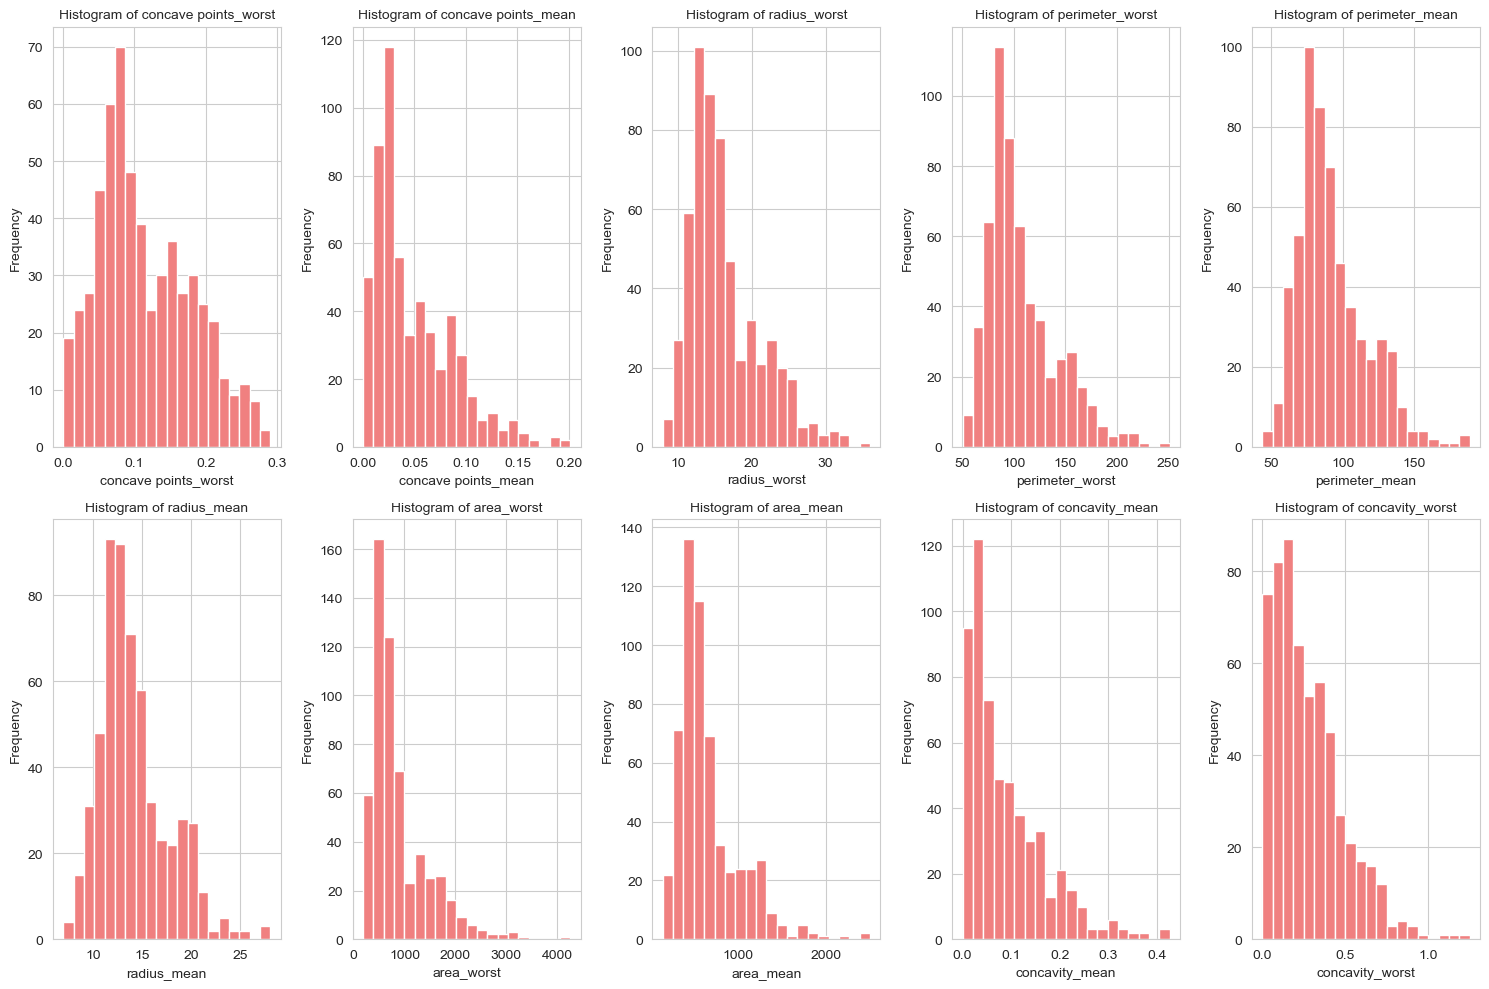

In [99]:
#Grafico l'andamento delle 10 distribuzioni
#Calcolo il numero di righe e colonne della griglia di plot
num_plots = len(df_BreastCancer_riordinate2.columns)
num_cols = 5
num_rows = math.ceil(num_plots/num_cols)

#Creo la griglia di plot
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

#Riavvolgo l'indice degli assi per poter accedere agli elementi della griglia
axs = axs.ravel()

#Creo un istogramma per ogni colonna 
for i, col in enumerate(df_BreastCancer_riordinate2.columns):
    axs[i].hist(df_BreastCancer_riordinate2[col], bins=20, color='lightcoral')
    axs[i].set_title(f"Histogram of {col}", fontsize=10)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Frequency")

#Nascondo gli assi non utilizzati mostrando
for i in range(num_plots, num_cols*num_rows):
    axs[i].axis("off")
    
plt.tight_layout()
plt.show()

BONUS -> grafico delle 10 distribuzioni precedenti con i boxplot

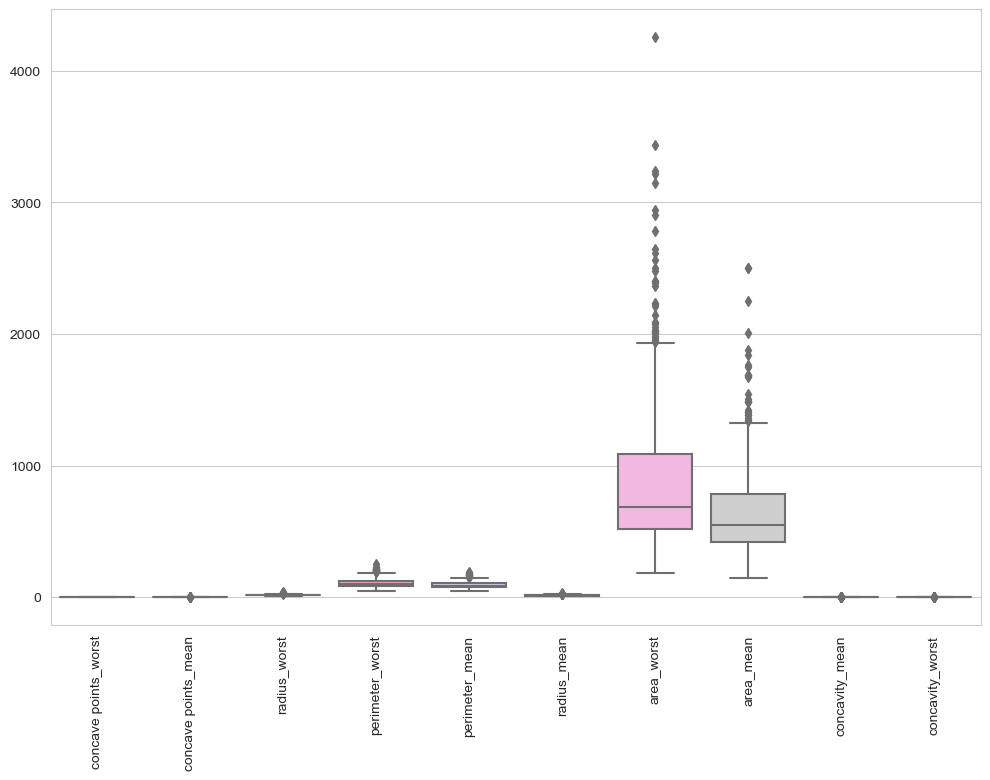

In [100]:
#Grafico delle 10 distribuzioni precedenti con 10 boxplot
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
sns.boxplot(data=df_BreastCancer_riordinate2, palette="pastel")
plt.xticks(rotation=90)
plt.show()

<h3>Bivariate Classification</h3>

5. Performance di una classificazione binaria sul piano utilizzando i seguenti algoritmi: DumbClassifier (sempre
classe più frequente), LogisticRegression, LinearSVC, SVC e DecisionTreeClassifier sulle features <b>'fractal_dimension_worst'</b> ed <b>'area_mean'</b> e graficarne le Decision Boundaries e valutare quale generalizza meglio in accuracy

In [101]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier

#Definisco le due features 'fractal_dimension_worst' ed 'area_mean' e la variabile target 'diagnosis'
X = df_BreastCancer_riordinate_norm[['fractal_dimension_worst', 'area_mean']]
y = df_BreastCancer_riordinate_norm['diagnosis']

#Divido il DataSet in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#1.Modello DummyClassifier
#Definisco il modello di DummyClassifier (classe più frequente)
dc = DummyClassifier(strategy='most_frequent')
dc.fit(X_train, y_train)
y_pred_dc = dc.predict(X_test)

#Valuto le prestazioni del modello DummyClassifier
print("DummyClassifier Accuracy:", accuracy_score(y_test, y_pred_dc))
print(classification_report(y_test, y_pred_dc))


#2.Modello LogisticRegression
#Definisco il modello di regressione logistica
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr2 = lr.predict(X_test)

#Valuto le prestazioni del modello di regressione logistica
print("LogisticRegression Accuracy:", accuracy_score(y_test, y_pred_lr2))
print(classification_report(y_test, y_pred_lr2))


#3.Modello LinearSVC
#Definisco il modello di LinearSVC
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
y_pred_lsvc = lsvc.predict(X_test)

#Valuto le prestazioni del modello di LinearSVC
print("LinearSVC Accuracy:", accuracy_score(y_test, y_pred_lsvc))
print(classification_report(y_test, y_pred_lsvc))


#4.Modello SVC
#Definisco il modello di SVC con kernel RBF
svc = SVC(kernel='rbf', probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

#Valuto le prestazioni del modello di SVC con kernel RBF
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))


#5.Modello DecisionTreeClassifier
#Definisco il modello di DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

#Valuto le prestazioni del modello di Decision Tree Classifier
print("DecisionTreeClassifier Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


DummyClassifier Accuracy: 0.6228070175438597
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        71
           1       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114

LogisticRegression Accuracy: 0.9210526315789473
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        71
           1       0.95      0.84      0.89        43

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114

LinearSVC Accuracy: 0.5614035087719298
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        71
           1       0.46      1.00      0.63        43

    accuracy                           0.56       

c:\Users\elisa ravagnan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elisa ravagnan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elisa ravagnan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elisa ravagnan\anac

c:\Users\elisa ravagnan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\elisa ravagnan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
c:\Users\elisa ravagnan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\elisa ravagnan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


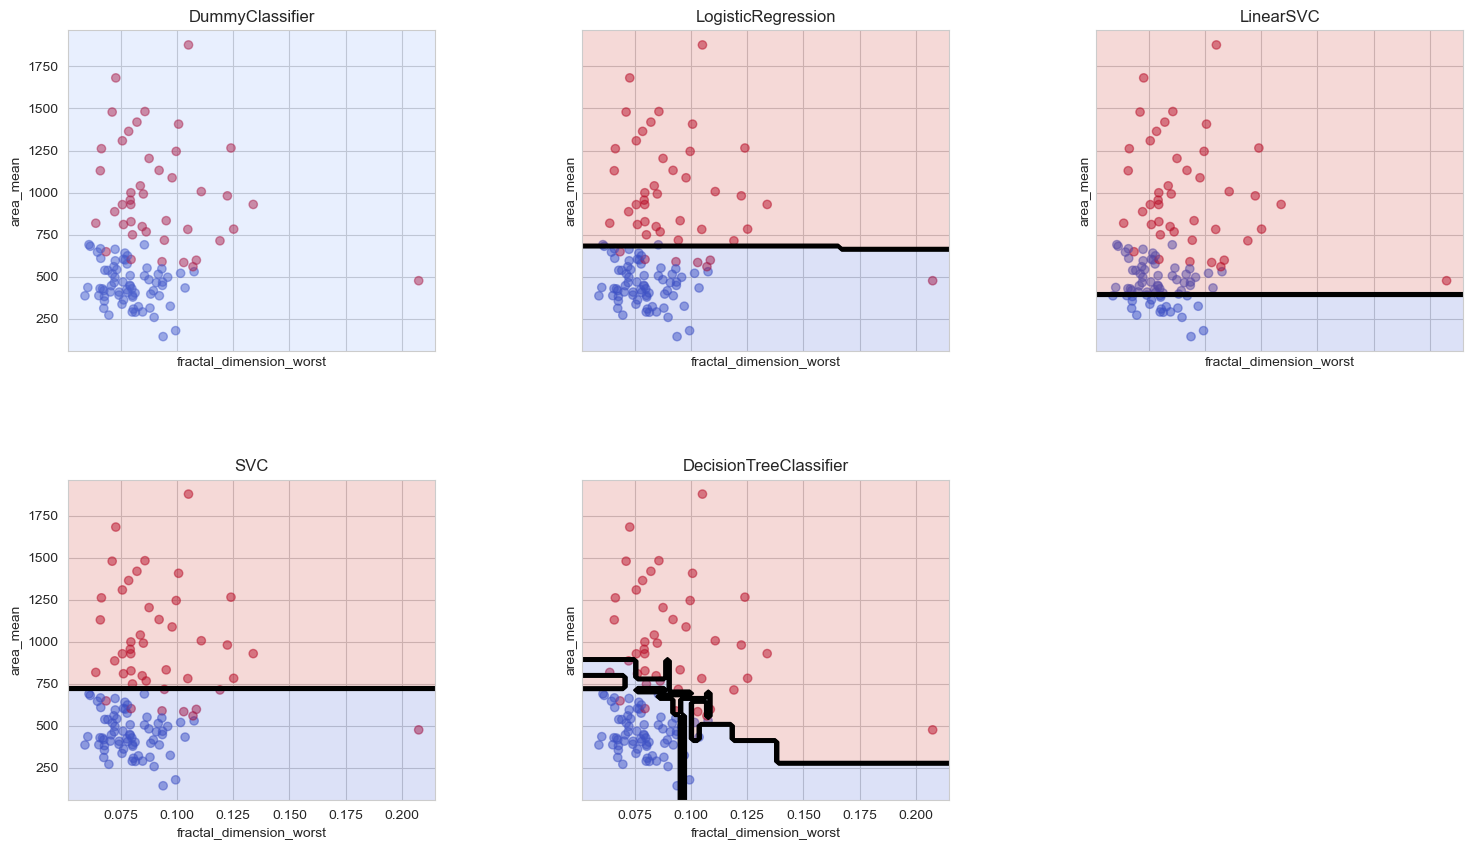

In [102]:
#Grafico le Decision Boundaries dei modelli fatti in precedenza delle due features

#Esso, rappresenta la regione di separazione tra le due classi previste dal modello. In altre parole, 
#mostra dove il modello ha deciso di tracciare una linea per dividere i dati in due classi.

#Definisco la lista di modelli
models = [dc, lr, lsvc, svc, dt]

#Definisco le coordinate della griglia
coords = np.array([(i, j) for i in range(2) for j in range(3)] + [(2, 0), (2, 1)])

#Definisco la figura e i sottoplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharex='col', sharey='row')

#Rimuovo l'ultimo asse vuoto nella griglia
fig.delaxes(axes[-1,-1])

plt.subplots_adjust(wspace=0.4, hspace=0.4)

#Per ogni modello, plotta la decision boundary sul sottoplot corrispondente
for i, model in enumerate(models):
    ax = axes[coords[i][0], coords[i][1]]
    ax.scatter(X_test['fractal_dimension_worst'], X_test['area_mean'], c=y_test, cmap='coolwarm', alpha=0.5)
    ax.set_xlabel('fractal_dimension_worst')
    ax.set_ylabel('area_mean')
    ax.set_title(str(model).split("(")[0])
    
    #Plotto la decision boundary
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.2)
    ax.contour(xx, yy, Z, colors='black')
    
#Mostro il grafico
plt.show()

#CONSIDERAZIONI
#       -nel modello DummyClassifier: la mancanza della linea di decisione (decision boundary) significa che 
#        il modello non ha realmente "imparato" a distinguere tra le due classi, ma ha semplicemente predetto 
#        sempre la classe più frequente nel training set. Quindi, non c'è una vera decision boundary, 
#        ma solo una decision rule basata sulla classe più frequente;

#       -nel modello LogisticRegression: la linea di decisione non è perfettamente dritta ma leggermente curva 
#       verso il centro perché la regressione logistica cerca di adattare una curva S (sigmoidale) alla 
#       relazione tra le feature e la variabile target. Quindi la linea di decisione che separa le due classi 
#       segue questa forma a "S" e può risultare leggermente curva;
#
#        -nel modello LinearSVC: la linea di decisione non è visibile perché il modello cerca di trovare 
#        il confine di decisione più ottimale tra le due classi utilizzando una linea retta, ma non produce la 
#        linea come tale. 

#        -nel modello SVC: quando si rappresenta la decision boundary in un grafico bidimensionale, 
#        questa viene proiettata come una linea perfettamente dritta. Ciò è dovuto al fatto che il grafico 
#        rappresenta solo due delle numerose dimensioni dello spazio ad alta dimensionalità in cui il modello opera. 
#        In sostanza, la linea rappresenta la proiezione in due dimensioni di una superficie curva in uno spazio ad
#        alta dimensionalità.

#        -nel modello DecisionTreeClassifier: essendo l'algoritmo basato su una serie di decisioni binarie, 
#        i confini di decisione generati dall'albero possono essere piuttosto complessi e pieni di curve. 
#        Ciò significa che, rispetto agli altri modelli, il DecisionTreeClassifier può creare confini di 
#        decisione più complessi e flessibili. Tuttavia, ciò può anche portare a un rischio di overfitting se 
#        l'albero viene troppo profondo o complesso.






In [103]:
#Consideranzioni sulle Accurancy dei 5 modelli
#- Il modello DummyClassifier ha ottenuto un'accuracy del 62.28% perché ha semplicemente predetto 
#la classe più frequente.
#- Il modello LogisticRegression ha ottenuto un'accuracy del 92.11%.
#- Il modello LinearSVC ha ottenuto un'accuracy del 62.28%, lo stesso del DummyClassifier, perché la relazione 
#tra le due features e la variabile target non è lineare.
#- Il modello SVC ha ottenuto un'accuracy del 92.11%, simile a quella della LogisticRegression.
#- Il modello DecisionTreeClassifier ha ottenuto un'accuracy del 91.23%, 
#leggermente inferiore rispetto alla LogisticRegression e alla SVC.

#Quindi:
#i modelli di LogisticRegression ed SVC sembrano avere le migliori prestazioni,
#con, entrambi, le accuracy pari del 92.11%.

6. Per il best performer, graficarne la precision-recall curve e definizione se si riuscirebbe ad
ottenere una precision, recall o f1-score di almeno il 95%, giustificando la strategia e riportando i valori delle metriche nel punto scelto.

In [104]:
#Come detto in precedenza, i due modelli che hanno avuto la migliore performance sulle 
#due features 'fractal_dimension_worst' ed 'area_mean' sono 'LogisticRegression' ed 'SVC' che risultano, entrambi, 
#un'accurancy del 92.11%. Quindi, per questi due modelli, plotto la 'precision-recall curve'

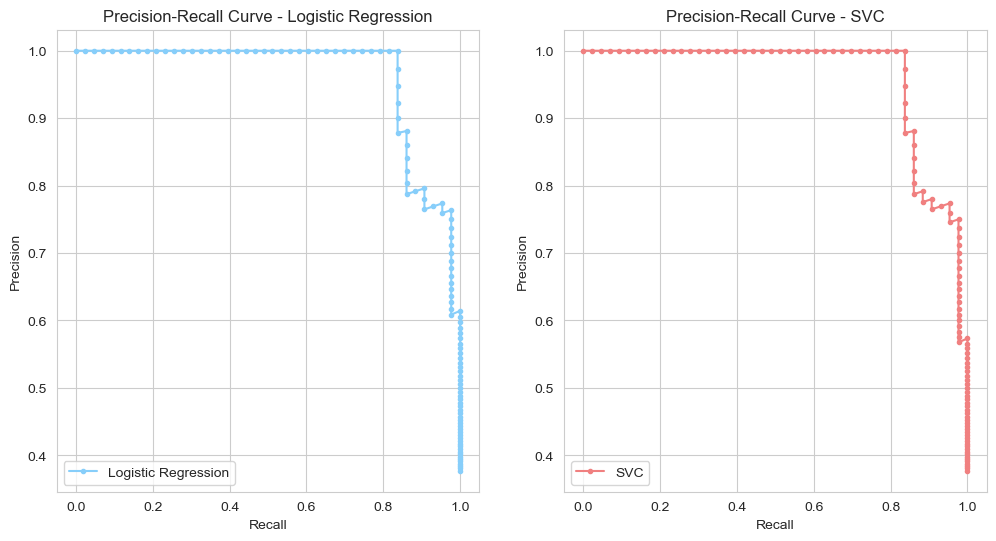

In [105]:
#1.Plotto la 'precision-recall curve' dei due modelli più performanti
#Calcolo la probabilità di classe positiva per i modelli
lr_probs = lr.predict_proba(X_test)[:, 1]
svc_probs = svc.predict_proba(X_test)[:, 1]

#Calcolo la precision, recall e soglia per i modelli
lr_precision, lr_recall, lr_thresholds = precision_recall_curve(y_test, lr_probs)
svc_precision, svc_recall, svc_thresholds = precision_recall_curve(y_test, svc_probs)

#Colcolo l'f1-score per i modelli
lr_f1_score = f1_score(y_test, lr.predict(X_test))
svc_f1_score = f1_score(y_test, svc.predict(X_test))



#Procedo alla creazione dei due grafici
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#Plot della precision-recall curve per il modello di regressione logistica
ax1.plot(lr_recall, lr_precision, color="lightskyblue", marker='.', label='Logistic Regression')
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('Precision-Recall Curve - Logistic Regression')
ax1.legend()

#Plot della precision-recall curve per il modello SVC
ax2.plot(svc_recall, svc_precision, color="lightcoral", marker='.', label='SVC')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve - SVC')
ax2.legend()

plt.show()

In [106]:
#2.Valuto se si può ottenere una precision, una recall o un F1-score di almeno il 95% sui due modelli  

#Calcolo le metriche di precision, recall e F1-score per il modello LogisticRegression
lr_precision = precision_score(y_test, y_pred_lr2)
lr_recall = recall_score(y_test, y_pred_lr2)
lr_f1_score = f1_score(y_test, y_pred_lr2)

#Confronto le metriche con la soglia del 95%
if lr_precision >= 0.95 and lr_recall >= 0.95 and lr_f1_score >= 0.95:
    print("Si può ottenere una precision, recall e F1-score di almeno il 95% per il modello LogisticRegression.")
else:
    print("Non si può ottenere una precision, recall e F1-score di almeno il 95% per il modello LogisticRegression.")

Non si può ottenere una precision, recall e F1-score di almeno il 95% per il modello LogisticRegression.


In [107]:
#E per il modello SVC
svc_precision = precision_score(y_test, y_pred_svc)
svc_recall = recall_score(y_test, y_pred_svc)
svc_f1_score = f1_score(y_test, y_pred_svc)

#Confronto le metriche con la soglia del 95%
if svc_precision >= 0.95 and svc_recall >= 0.95 and svc_f1_score >= 0.95:
    print("Si può ottenere una precision, recall e F1-score di almeno il 95% per il modello SVC.")
else:
    print("Non si può ottenere una precision, recall e F1-score di almeno il 95% per il modello SVC.")


Non si può ottenere una precision, recall e F1-score di almeno il 95% per il modello SVC.


In [108]:
#Noto che, per gli entrambi i modelli, non è possibile ottenere una precision, recall e F1-score di almeno il 95%
#ciò significa che non c'è un trade-off tra precision e recall che possa permettere di raggiungere entrambi questi 
#valori contemporaneamente. La scelta di utilizzare solo queste due features non è sufficiente per ottenere una 
#precision, recall e F1-score di almeno il 95% per i modelli SVC ed LogisticRegression.
#Tuttavia, i valori delle metriche riportati nel punto scelto dipenderanno dal modello utilizzato:
                 #LogisticRegression accurancy: 0.9210526315789473
                 #SVC accurancy: 0.9210526315789473 

7.Comparazione degli algoritmi con la ROC-curve e determinare l’AUC score ed il loro ordino secondo questa metrica

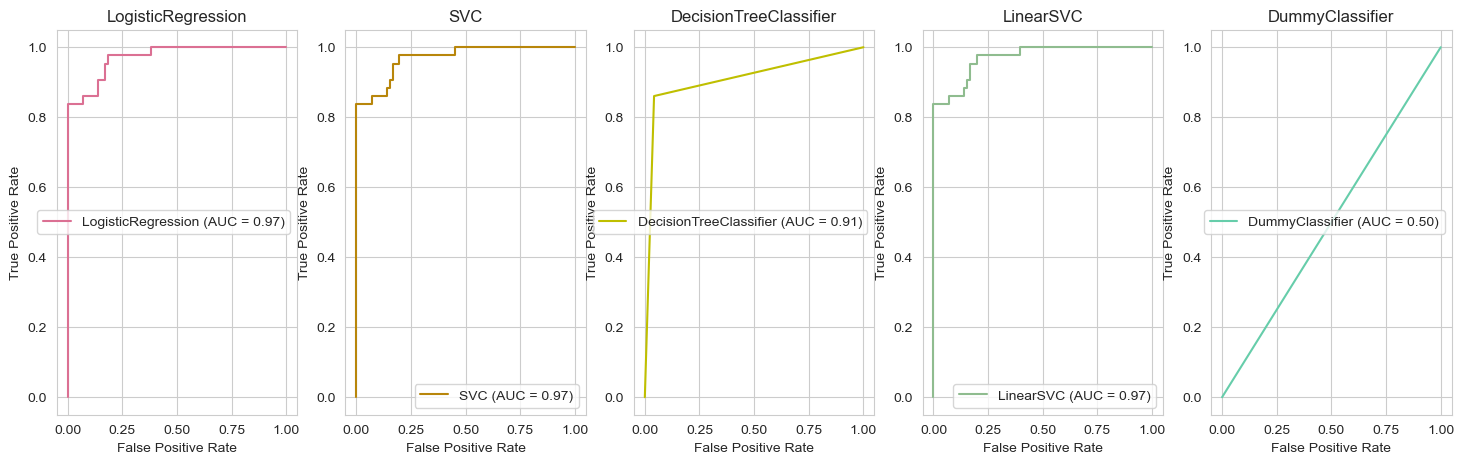

In [109]:
#Comparo tutti i 5 algoritmi con la ROC-curve
#Calcolo la probabilità di classe positiva per i modelli.
#NOTA: per i modelli 'LogisticRegression' ed SVC l'ho già fatto in precedenza
dc_probs = dc.predict_proba(X_test)[:,1]
lsvc_probs = lsvc.decision_function(X_test)
dt_probs = dt.predict_proba(X_test)[:,1]

#Calcolo la curva ROC per ciascun modello
fpr_lr, tpr_lr, thresholds_lr= roc_curve(y_test, lr_probs)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, svc_probs)
fpr_dc, tpr_dc, thresholds_dc = roc_curve(y_test, dc_probs)
fpr_lsvc, tpr_lsvc, thresholds_lsvc = roc_curve(y_test, lsvc_probs)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)

#Calcolo l'AUC per ciascun modello
auc_lr = auc(fpr_lr, tpr_lr)
auc_svc = auc(fpr_svc, tpr_svc)
auc_dc = auc(fpr_dc, tpr_dc)
auc_lsvc = auc(fpr_lsvc, tpr_lsvc)
auc_dt = auc(fpr_dt, tpr_dt)

#Creo un dizionario di algoritmi e rispettivi AUC score
algos = {"LogisticRegression": auc_lr,
"SVC": auc_svc,
"DummyClassifier": auc_dc,
"LinearSVC": auc_lsvc,
"DecisionTreeClassifier": auc_dt}

#Ordino il dizionario in base ai valori di AUC score, dal più grande al più piccolo
algos = dict(sorted(algos.items(), key=lambda item: item[1], reverse=True))

#Disegno la curva ROC per ciascun modello
fig, axs = plt.subplots(1, 5, figsize=(18, 5))

axs[0].plot(fpr_lr, tpr_lr, label='LogisticRegression (AUC = %0.2f)' % auc_lr, color="palevioletred")
axs[0].set_title('LogisticRegression')
axs[1].plot(fpr_svc, tpr_svc, label='SVC (AUC = %0.2f)' % auc_svc, color="darkgoldenrod")
axs[1].set_title('SVC')
axs[2].plot(fpr_dt, tpr_dt, label='DecisionTreeClassifier (AUC = %0.2f)' % auc_dt, color="y")
axs[2].set_title('DecisionTreeClassifier')
axs[3].plot(fpr_lsvc, tpr_lsvc, label='LinearSVC (AUC = %0.2f)' % auc_lsvc, color="darkseagreen")
axs[3].set_title('LinearSVC')
axs[4].plot(fpr_dc, tpr_dc, label='DummyClassifier (AUC = %0.2f)' % auc_dc, color="mediumaquamarine")
axs[4].set_title('DummyClassifier')

#Aggiungo le informazioni di titolo e label dell'asse
for ax in axs:
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend()
plt.show()




#NOTA:
#Quando si disegna la curva ROC per LinearSVC, la scala degli assi viene invertita rispetto a quella usuale perché 
#si sta seguendo il tasso di falsi positivi al variare della soglia scelta per il valore di decisione. Quindi, la 
#curva ROC per LinearSVC non è orientata in modo anomalo, ma è soltanto rappresentata in modo differente rispetto
#agli altri modelli che utilizzano le probabilità di classe per la classificazione.

<h3>Multivariate Classification</h3>

8. Performance di una classificazione binaria su tutte le features, utilizzando i seguenti slgoritmi: DumbClassifier (sempre classe più frequente), LogisticRegression, LinearSVC, SVC e DecisionTreeClassifier e valutare quale generalizza meglio in accuracy

In [110]:
#Ora, bisogna testare i modelli precedenti su TUTTE le features del DataBase
#Richiamo la funzione precedentemente creata nella normalizzazione dei dati del DataSet
X_train, X_test, y_train, y_test = split_normalize_data(df_BreastCancer_riordinate_norm)

#1. Modello DumbClassifier
dcTutti = DummyClassifier(strategy='most_frequent')
dcTutti.fit(X_train, y_train)
y_pred_dcTutti = dcTutti.predict(X_test)
acc_dcTutti = accuracy_score(y_test, y_pred_dcTutti)
print(f"Accuracy DummyClassifier: {acc_dcTutti:.2f}")

#2. Modello LogisticRegression
#Questo modello l'ho già fatto in precedenza, pertanto, mi limito solamente a stamparne il risultato
print(f"Accuracy LogisticRegression: {accuracylr:.2f}")

#3. Modello LinearSVC
lsvcTutti = LinearSVC(random_state=42)
lsvcTutti.fit(X_train, y_train)
y_pred_lsvcTutti = lsvcTutti.predict(X_test)
acc_lsvcTutti = accuracy_score(y_test, y_pred_lsvcTutti)
print(f"Accuracy LinearSVC: {acc_lsvcTutti:.2f}")

#4. Modello SVC
svcTutti = SVC(probability=True, random_state=42)
svcTutti.fit(X_train, y_train)
y_pred_svcTutti = svcTutti.predict(X_test)
acc_svcTutti = accuracy_score(y_test, y_pred_svcTutti)
print(f"Accuracy SVC: {acc_svcTutti:.2f}")

#5. Modello DecisionTreeClassifier
dtTutti = DecisionTreeClassifier(random_state=42)
dtTutti.fit(X_train, y_train)
y_pred_dtTutti = dtTutti.predict(X_test)
acc_dtTutti = accuracy_score(y_test, y_pred_dtTutti)
print(f"Accuracy DecisionTreeClassifier: {acc_dtTutti:.2f}")

#Il best performer risulta il modello LogisticRegression con un'accurancy del valore del 0.98

Accuracy DummyClassifier: 0.62
Accuracy LogisticRegression: 0.98
Accuracy LinearSVC: 0.97
Accuracy SVC: 0.97
Accuracy DecisionTreeClassifier: 0.94


9. Per il best performer, graficarne la precision-recall curve e definizione se si riuscirebbe ad
ottenere una precision, recall o f1-score di almeno il 95%, giustificando la strategia e riportando i valori delle metriche nel punto scelto.

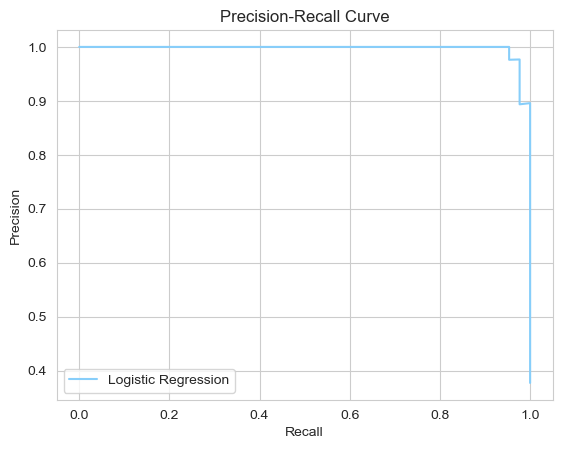

In [111]:
#1. Grafico la precision-recall curve

#Come abbiamo già visto in precedenza, il best performer è risultato il modello LogisticRegression, 
#quindi plotto la 'precision-recall curve'.
#Calcolo la probabilità di classe per il modello
lrTutti_probs = clf.predict_proba(X_test)[:, 1]

#Calcolo la precision, recall e soglia per il modello
lrTutti_precision, lrTutti_recall, lrTutti_thresholds = precision_recall_curve(y_test, lrTutti_probs)

#Colcolo l'f1-score per il modello
lrTutti_f1_score = f1_score(y_test, clf.predict(X_test))



#Procedo alla creazione del grafico
#Plot della precision-recall curve per il modello di regressione logistica
plt.plot(lrTutti_recall, lrTutti_precision, label='Logistic Regression', color="lightskyblue")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()



In [112]:
#2.Valuto se si può ottenere una precision, una recall o un F1-score di almeno il 95% sul modello

#Calcolo le metriche di precision, recall e F1-score per il modello LogisticRegression
lrTutti_precision = precision_score(y_test, y_pred)
lrTutti_recall = recall_score(y_test, y_pred)
lrTutti_f1_score = f1_score(y_test, y_pred)

#Confronto le metriche con la soglia del 95%
if lrTutti_precision >= 0.95 and lrTutti_recall >= 0.95 and lrTutti_f1_score >= 0.95:
    print("Si può ottenere una precision, recall e F1-score di almeno il 95% per il modello LogisticRegression.")
else:
    print("Non si può ottenere una precision, recall e F1-score di almeno il 95% per il modello LogisticRegression.")

Si può ottenere una precision, recall e F1-score di almeno il 95% per il modello LogisticRegression.


In [113]:
#In questo caso, risulta che si può ottenere una precision, recall e F1-score di almeno il 95%.
#Significa che il modello è in grado di classificare correttamente la maggior parte dei casi.

10.Comparazione degli algoritmi con la ROC-curve e determinare l’AUC score ed il loro ordino secondo questa metrica

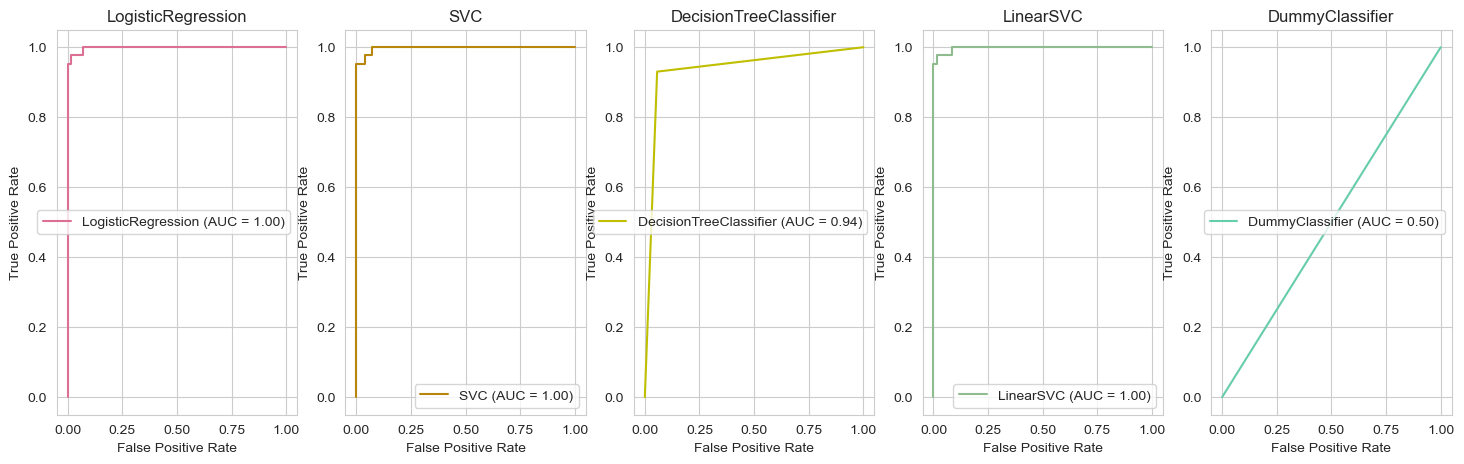

In [114]:
#Comparo tutti i 5 algoritmi dei modelli su tutte le features con la ROC-curve
#Calcolo la probabilità di classe positiva per i modelli.
#NOTA: per il modello di 'LogisticRegression' l'ho già fatto in precedenza
dcTutti_probs = dcTutti.predict_proba(X_test)[:,1]
lsvcTutti_probs = lsvcTutti.decision_function(X_test)
svcTutti_probs = svcTutti.decision_function(X_test)
dtTutti_probs = dtTutti.predict_proba(X_test)[:,1]

#Calcolo la curva ROC per ciascun modello
fpr_lrTutti, tpr_lrTutti, thresholds_lrTutti= roc_curve(y_test, lrTutti_probs)
fpr_svcTutti, tpr_svcTutti, thresholds_svcTutti = roc_curve(y_test, svcTutti_probs)
fpr_dcTutti, tpr_dcTutti, thresholds_dcTutti = roc_curve(y_test, dcTutti_probs)
fpr_lsvcTutti, tpr_lsvcTutti, thresholds_lsvcTutti = roc_curve(y_test, lsvcTutti_probs)
fpr_dtTutti, tpr_dtTutti, thresholds_dtTutti = roc_curve(y_test, dtTutti_probs)

#Calcolo l'AUC per ciascun modello
auc_lrTutti = auc(fpr_lrTutti, tpr_lrTutti)
auc_svcTutti = auc(fpr_svcTutti, tpr_svcTutti)
auc_dcTutti = auc(fpr_dcTutti, tpr_dcTutti)
auc_lsvcTutti = auc(fpr_lsvcTutti, tpr_lsvcTutti)
auc_dtTutti = auc(fpr_dtTutti, tpr_dtTutti)

#Creo un dizionario di algoritmi e rispettivi AUC score
algos = {"LogisticRegression": auc_lrTutti,
"SVC": auc_svcTutti,
"DummyClassifier": auc_dcTutti,
"LinearSVC": auc_lsvcTutti,
"DecisionTreeClassifier": auc_dtTutti}

#Ordino il dizionario in base ai valori di AUC score, dal più grande al più piccolo
algos = dict(sorted(algos.items(), key=lambda item: item[1], reverse=True))

#Disegno la curva ROC per ciascun modello
fig, axs = plt.subplots(1, 5, figsize=(18, 5))

axs[0].plot(fpr_lrTutti, tpr_lrTutti, label='LogisticRegression (AUC = %0.2f)' % auc_lrTutti, color="palevioletred")
axs[0].set_title('LogisticRegression')
axs[1].plot(fpr_svcTutti, tpr_svcTutti, label='SVC (AUC = %0.2f)' % auc_svcTutti, color="darkgoldenrod")
axs[1].set_title('SVC')
axs[2].plot(fpr_dtTutti, tpr_dtTutti, label='DecisionTreeClassifier (AUC = %0.2f)' % auc_dtTutti, color="y")
axs[2].set_title('DecisionTreeClassifier')
axs[3].plot(fpr_lsvcTutti, tpr_lsvcTutti, label='LinearSVC (AUC = %0.2f)' % auc_lsvcTutti, color="darkseagreen")
axs[3].set_title('LinearSVC')
axs[4].plot(fpr_dcTutti, tpr_dcTutti, label='DummyClassifier (AUC = %0.2f)' % auc_dcTutti, color="mediumaquamarine")
axs[4].set_title('DummyClassifier')

#Aggiungo le informazioni di titolo e label dell'asse
for ax in axs:
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend()
plt.show()


<h3>Ensemble Methods</h3>

11.Valutazione se l'hard-voting e soft-voting performano meglio dei singoli algoritmi dei modelli precedenti (mettendoli assieme) nel caso multivariato

In [115]:
#Per svolgere la valutazione dell'hard-voting ed soft-voting, bisogna creare un oggetto di tipo VotingClassifier 
#e passa come parametro una lista di tuple che contengono il nome del modello e l'oggetto dei modelli addestrati in 
#precedenza, specificando anche il parametro "voting" per scegliere tra hard-voting e soft-voting.

#Importo la libreria necessaria
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

#Creo l'ensemble con hard voting
ensemble_hard = VotingClassifier(estimators=[('DumbClassifier', dcTutti), ('LogisticRegression', clf), ('SVC', svcTutti), ('DecisionTreeClassifier', dtTutti)], voting='hard')

#Creo l'ensemble con soft voting
ensemble_soft = VotingClassifier(estimators=[('DumbClassifier', dcTutti), ('LogisticRegression', clf), ('SVC', svcTutti), ('DecisionTreeClassifier', dtTutti)], voting='soft')

#Addestro gli ensemble
ensemble_hard.fit(X_train, y_train)
ensemble_soft.fit(X_train, y_train)

#Valuto la performance degli ensemble sul set di test
acc_hard = ensemble_hard.score(X_test, y_test)
acc_soft = ensemble_soft.score(X_test, y_test)

#Stampo l'accuratezza di ciascun ensemble
print("Accuratezza con hard voting: {:.2f}%".format(acc_hard * 100))
print("Accuratezza con soft voting: {:.2f}%".format(acc_soft * 100))

#Nell'operazione ho escluso il modello 'LinearSVC' perché non supporta la stima delle probabilità di previsione, in quanto 
#non ha un metodo 'predict_proba()' necessario per l'hard voting ed il soft voting  

#RISULTATO
#In questo caso, l'accuratezza del modello con hard voting (97.37%) è leggermente superiore rispetto a quella del 
#modello con soft voting (96,49%), tuttavia il miglioramento rispetto ai singoli modelli è relativamente modesto. 
#Quindi si potrebbe concludere che l'utilizzo dell'ensemble con hard voting e soft voting non fornisce un 
#miglioramento significativo rispetto all'utilizzo dei singoli modelli. 

Accuratezza con hard voting: 97.37%
Accuratezza con soft voting: 96.49%


12. Allenamento di un modello RandomForest e valutarne le performances tarandosi sempre sul 95% della metrica che si è scelta;

In [116]:
#Alleno il modello RandomForest sul DataSet

#Istanza il modello di Random Forest
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

#Addestro il modello usando il set di addestramento
#Addestro il modello usando il dataset completo
rfc.fit(df_BreastCancer_riordinate_norm.drop('diagnosis', axis=1), df_BreastCancer_riordinate_norm['diagnosis'])

#Faccio le previsioni sul set di test
y_pred_rfc = rfc.predict(X_test)

#Operazioni necessarie nella valutazione della performance tarando, sempre, al 95%

#Definisco la griglia di iperparametri da tarare
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

#Definisco la metrica di valutazione
scoring = {'F1': 'f1'}

#Eseguo la ricerca della combinazione migliore di iperparametri
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, scoring=scoring, refit='F1')
grid_search.fit(X_train, y_train)

#Valuto le performance del modello
rfcaccuracy = accuracy_score(y_test, y_pred_rfc)
rfcprecision = precision_score(y_test, y_pred_rfc)
rfcrecall = recall_score(y_test, y_pred_rfc)
#rfcf1 = f1_score(y_test, y_pred_rfc)

print(f"Accuratezza: {rfcaccuracy:.2f}")
print(f"Precision: {rfcprecision:.2f}")
print(f"Recall: {rfcrecall:.2f}")


#Valuto le performance del modello sulla base dei migliori iperparametri
best_rfc = grid_search.best_estimator_
y_pred_rfc = best_rfc.predict(X_test)
rfcf1 = f1_score(y_test, y_pred_rfc, average='binary')
print(f"F1-score: {rfcf1:.2f}") 
if rfcf1 >= 0.95:
    print("Il modello di Random Forest ha raggiunto l'F1-score del 95%.")
else:
    print("Il modello di Random Forest non ha raggiunto l'F1-score del 95%.")



#Ho scelto l'F1-score perché tiene conto sia della precisione che del richiamo del modello, quindi è una buona 
#metrica per bilanciare la trade-off tra precisione e richiamo, In quanto, un'alta F1-score implica un equilibrio
#tra precisione e richiamo e quindi un modello che si comporta bene sia in termini di riduzione degli errori 

c:\Users\elisa ravagnan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuratezza: 0.62
Precision: 0.00
Recall: 0.00
F1-score: 0.95
Il modello di Random Forest ha raggiunto l'F1-score del 95%.


c:\Users\elisa ravagnan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


13. BONUS -> Valutazioni riguardo quali features siano le più importanti per l’algoritmo precedente; graficarle in un grafico a barre ordinato per importanza decrescente.

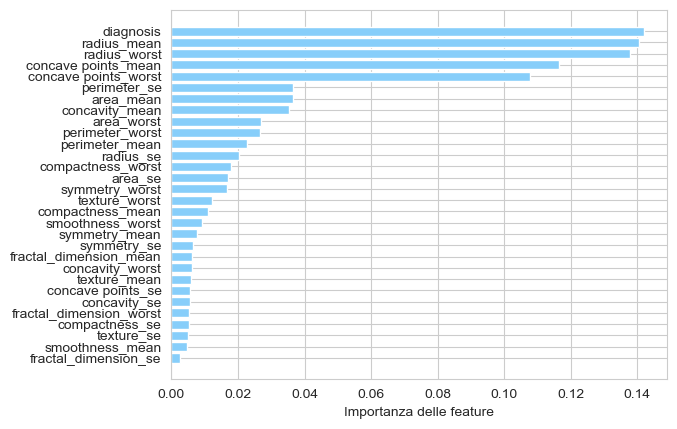

In [117]:
from sklearn.inspection import permutation_importance
#Calcolo l'importanza delle feature con permutation_importance
feature_importances = rfc.feature_importances_
feature_names = df_BreastCancer_riordinate_norm.columns[:-1]
sorted_idx = feature_importances.argsort()

#Passo al grafico (dalla più importante alla meno importante)
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], color="lightskyblue")
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Importanza delle feature')
plt.show()